# House Prices : Advanced Regression Techniques(Part 2)
- Predict sales prices

## Data Dictonary

### variable

In [668]:
text = open('data_description.txt', mode = 'r').read()
print(text)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Data Exploration

In [669]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 80)

%matplotlib inline

In [670]:
train = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')

In [671]:
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,14,4,65.0,8450,1,3,1,3,4,1,12,1,1,1,4,7,5,4.0,2,5,7,12,10,1,196.0,2,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,3,4,80.0,9600,1,3,1,3,3,1,20,3,1,1,3,6,8,2.0,2,5,7,5,4,2,0.0,3,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,14,4,68.0,11250,1,3,3,3,4,1,12,1,1,1,4,7,5,5.0,3,5,7,12,10,1,162.0,2,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,0,4,60.0,9550,1,3,3,3,1,1,21,1,1,1,4,7,5,1.0,1,5,7,14,13,2,0.0,3,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,14,4,84.0,14260,1,3,3,3,3,1,1,1,1,1,4,8,5,4.0,2,5,7,12,10,1,350.0,2,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [672]:
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1461,3,5,80.0,11622,1,3,1,3,4,1,24,3,1,1,3,5,6,1.0,0,5,7,12,10,2,0.0,3,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1,1462,3,4,81.0,14267,1,3,3,3,1,1,24,1,1,1,3,6,6,1.0,0,1,7,14,15,1,108.0,3,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,2,1463,14,4,74.0,13830,1,3,3,3,4,1,14,1,1,1,4,5,5,4.0,3,5,7,12,10,2,0.0,3,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,3,1464,14,4,78.0,9978,1,3,3,3,4,1,14,1,1,1,4,6,6,4.0,3,5,7,12,10,1,20.0,3,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,4,1465,13,4,43.0,5005,1,3,3,1,4,1,8,1,1,2,3,8,5,4.0,2,5,7,4,2,2,0.0,2,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [673]:
train.drop(train.columns[0], axis = 1, inplace = True)
test.drop(test.columns[0], axis = 1, inplace = True)

## Feature Engineering

In [674]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')
train_test_data = [train, test]

In [675]:
train_test_data[0].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,14,4,65.0,8450,1,3,1,3,4,1,12,1,1,1,4,7,5,4.0,2,5,7,12,10,1,196.0,2,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,3,4,80.0,9600,1,3,1,3,3,1,20,3,1,1,3,6,8,2.0,2,5,7,5,4,2,0.0,3,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,14,4,68.0,11250,1,3,3,3,4,1,12,1,1,1,4,7,5,5.0,3,5,7,12,10,1,162.0,2,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,0,4,60.0,9550,1,3,3,3,1,1,21,1,1,1,4,7,5,1.0,1,5,7,14,13,2,0.0,3,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,14,4,84.0,14260,1,3,3,3,3,1,1,1,1,1,4,8,5,4.0,2,5,7,12,10,1,350.0,2,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 0. Functions

In [676]:
def chart_bar(feature):
    ax = train[[feature, 'SalePrice']].groupby(feature).mean().plot(kind = 'bar', figsize = (20,5), title = feature)
    ax.title.set_size(20)
    ax.set_xlabel(feature, fontsize = 20)
    ax.set_ylabel('Price', fontsize = 20)

In [677]:
def train_test_info(feature, **options):
    print('Information of {}'.format(feature), '\n')
    for data, a in zip(train_test_data, ['Train', 'Test']):
        print(a)
        print('Number of null : ', data[feature].isnull().sum())
        print('Number of value unique : ', len(data[feature].unique()))
        if options.get('sort') == True:
            print('Kind of value unique : ', np.sort(data[feature].unique()))
        elif options.get('cut') == True:
            print('Kind of value unique : ----')
        else:
            print('Kind of value unique : ', data[feature].unique())
        print('\n')

In [678]:
def mapping(feature, **options):
    uni1 = set(train_raw[feature].unique())
    uni2 = set(test_raw[feature].unique())
    feature_mapping = {}
    uni = uni1.union(uni2)
    if options.get('no') == True:
        uni.remove(np.nan)
    for index, i in zip(uni, range(len(uni))):
        feature_mapping.update({index : i})
    for data in train_test_data:
        data[feature] = data[feature].map(feature_mapping)
    train_test_info(feature)
    return feature_mapping

In [679]:
def mapping2(feature, **options):
    uni1 = set(corr[feature].unique())
    uni2 = set(corr[feature].unique())
    feature_mapping = {}
    uni = uni1.union(uni2)
    if options.get('no') == True:
        uni.remove(np.nan)
    for index, i in zip(uni, range(len(uni))):
        feature_mapping.update({index : i})
    corr[feature] = corr[feature].map(feature_mapping)
    return feature_mapping

### 28. ExterCond
Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [680]:
train_test_info('ExterCond')

Information of ExterCond 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['TA' 'Gd' 'Fa' 'Po' 'Ex']


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['TA' 'Gd' 'Fa' 'Po' 'Ex']




In [681]:
mapping('ExterCond')

Information of ExterCond 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  [0 2 1 4 3]


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  [0 2 1 4 3]




{'Ex': 3, 'Fa': 1, 'Gd': 2, 'Po': 4, 'TA': 0}

### 29. Foundation
Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [682]:
train_test_info('Foundation')

Information of Foundation 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  ['CBlock' 'PConc' 'BrkTil' 'Stone' 'Slab' 'Wood']




In [683]:
mapping('Foundation')

Information of Foundation 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  [5 1 3 4 2 0]


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  [1 5 3 0 2 4]




{'BrkTil': 3, 'CBlock': 1, 'PConc': 5, 'Slab': 2, 'Stone': 0, 'Wood': 4}

### 30. BsmtQual
Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [684]:
train_test_info('BsmtQual')

Information of BsmtQual 

Train
Number of null :  37
Number of value unique :  5
Kind of value unique :  ['Gd' 'TA' 'Ex' nan 'Fa']


Test
Number of null :  44
Number of value unique :  5
Kind of value unique :  ['TA' 'Gd' 'Ex' 'Fa' nan]




### 30-1. Fill NaN

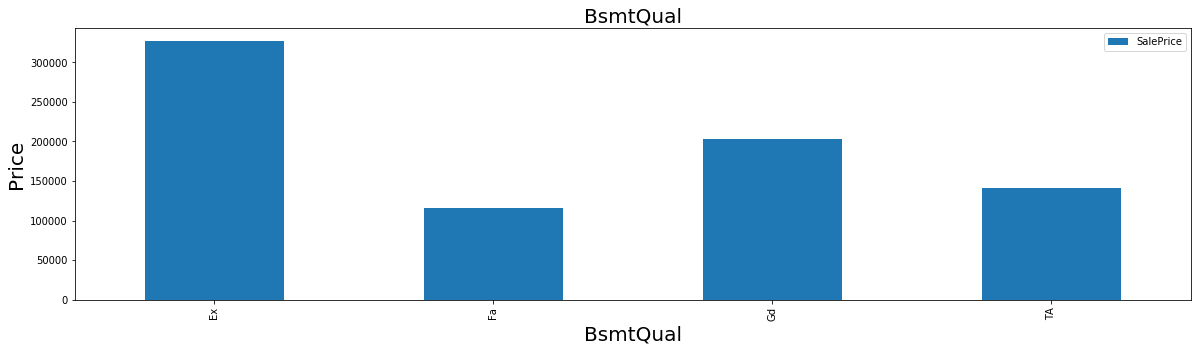

In [685]:
chart_bar('BsmtQual')

In [686]:
mapping('BsmtQual')

Information of BsmtQual 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  [3 1 4 0 2]


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  [1 3 4 2 0]




{nan: 0, 'TA': 1, 'Fa': 2, 'Gd': 3, 'Ex': 4}

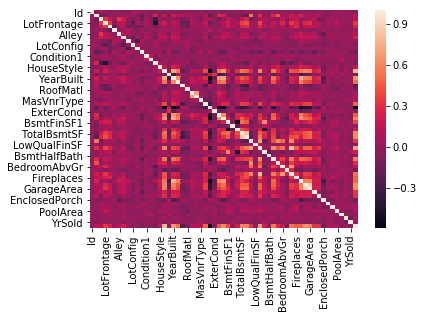

In [687]:
df1 = train.corr()
plt.figure()
sns.heatmap(df1)

In [688]:
df1['BsmtQual'].sort_values(ascending = False).iloc[1:].head()

YearBuilt      0.738300
GarageYrBlt    0.658819
OverallQual    0.655295
Foundation     0.624026
SalePrice      0.610444
Name: BsmtQual, dtype: float64

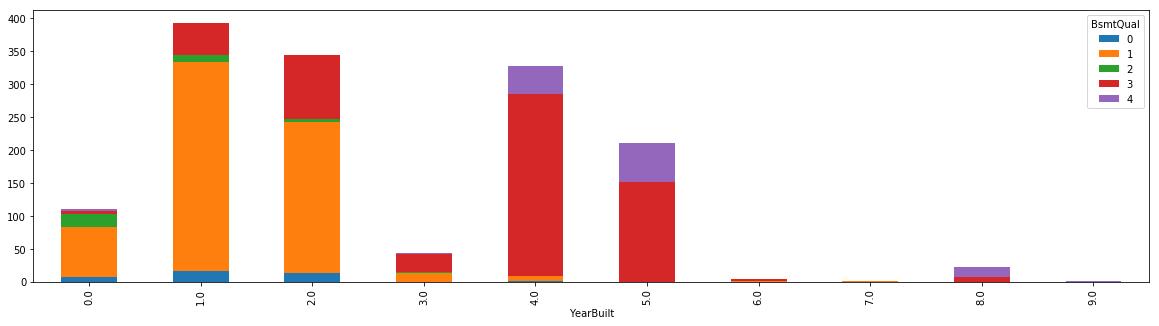

In [689]:
train[['YearBuilt', 'BsmtQual']].groupby(['YearBuilt', 'BsmtQual']).size().unstack().plot(kind = 'bar', figsize = (20,5), stacked = True)

### 30-2. mapping

In [690]:
train.loc[(train['YearBuilt'] == 0) & (train['BsmtQual'] == 1), 'BsmtQual'] = 0
train.loc[(train['YearBuilt'] == 1) & (train['BsmtQual'] == 1), 'BsmtQual'] = 0
train.loc[(train['YearBuilt'] == 2) & (train['BsmtQual'] == 1), 'BsmtQual'] = 0
train.loc[(train['YearBuilt'] == 3) & (train['BsmtQual'] == 1), 'BsmtQual'] = 2
train.loc[(train['YearBuilt'] == 4) & (train['BsmtQual'] == 1), 'BsmtQual'] = 2
train.loc[(train['YearBuilt'] == 5) & (train['BsmtQual'] == 1), 'BsmtQual'] = 2
train.loc[(train['YearBuilt'] == 6) & (train['BsmtQual'] == 1), 'BsmtQual'] = 2
train.loc[(train['YearBuilt'] == 7) & (train['BsmtQual'] == 1), 'BsmtQual'] = 0
train.loc[(train['YearBuilt'] == 8) & (train['BsmtQual'] == 1), 'BsmtQual'] = 4
train.loc[(train['YearBuilt'] == 9) & (train['BsmtQual'] == 1), 'BsmtQual'] = 4

In [691]:
test.loc[(test['YearBuilt'] == 0) & (test['BsmtQual'] == 1), 'BsmtQual'] = 0
test.loc[(test['YearBuilt'] == 1) & (test['BsmtQual'] == 1), 'BsmtQual'] = 0
test.loc[(test['YearBuilt'] == 2) & (test['BsmtQual'] == 1), 'BsmtQual'] = 0
test.loc[(test['YearBuilt'] == 3) & (test['BsmtQual'] == 1), 'BsmtQual'] = 2
test.loc[(test['YearBuilt'] == 4) & (test['BsmtQual'] == 1), 'BsmtQual'] = 2
test.loc[(test['YearBuilt'] == 5) & (test['BsmtQual'] == 1), 'BsmtQual'] = 2
test.loc[(test['YearBuilt'] == 6) & (test['BsmtQual'] == 1), 'BsmtQual'] = 2
test.loc[(test['YearBuilt'] == 7) & (test['BsmtQual'] == 1), 'BsmtQual'] = 0
test.loc[(test['YearBuilt'] == 8) & (test['BsmtQual'] == 1), 'BsmtQual'] = 4
test.loc[(test['YearBuilt'] == 9) & (test['BsmtQual'] == 1), 'BsmtQual'] = 4

In [692]:
train_test_info('BsmtQual')

Information of BsmtQual 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [3 0 4 2]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  [0 3 2 4]




### 31. BsmtCond
Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [693]:
train_test_info('BsmtCond')

Information of BsmtCond 

Train
Number of null :  37
Number of value unique :  5
Kind of value unique :  ['TA' 'Gd' nan 'Fa' 'Po']


Test
Number of null :  45
Number of value unique :  5
Kind of value unique :  ['TA' 'Po' 'Fa' 'Gd' nan]




### 31-1. Fill NaN

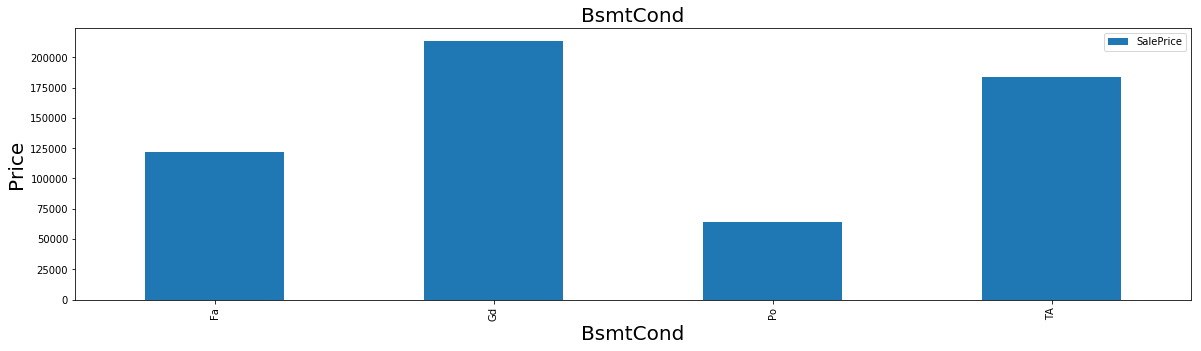

In [694]:
chart_bar('BsmtCond')

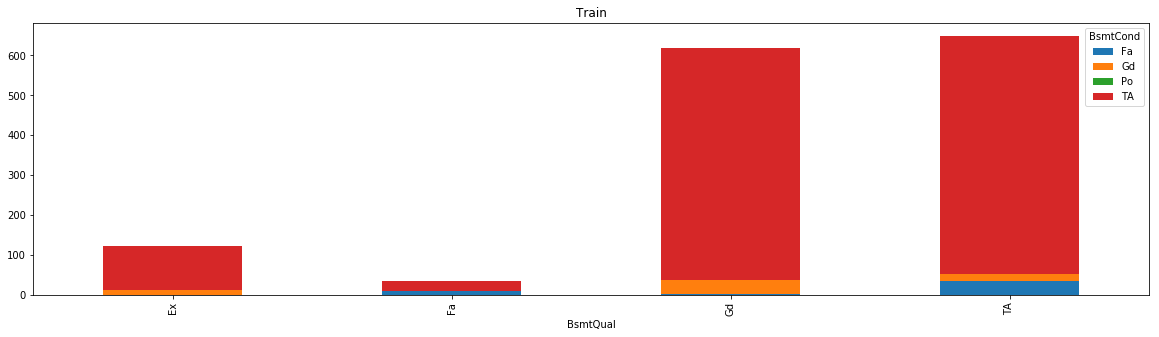

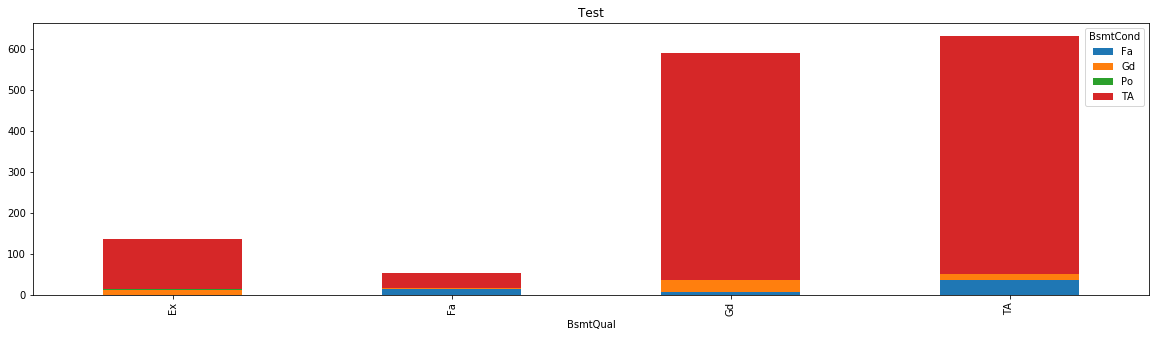

In [695]:
plt.figure()
train_raw[['BsmtQual', 'BsmtCond']].groupby(['BsmtQual', 'BsmtCond']).size().unstack().plot(kind = 'bar', figsize = (20,5), stacked = True, title = 'Train')
test_raw[['BsmtQual', 'BsmtCond']].groupby(['BsmtQual', 'BsmtCond']).size().unstack().plot(kind = 'bar', figsize = (20,5), stacked = True, title = 'Test')

In [696]:
for data in train_test_data:
    data['BsmtCond'] = data['BsmtCond'].fillna('TA')
mapping('BsmtCond')

Information of BsmtCond 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [1 3 2 4]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  [1 4 2 3]




{nan: 0, 'TA': 1, 'Fa': 2, 'Gd': 3, 'Po': 4}

### 32. BsmtExposure
Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [697]:
train_test_info('BsmtExposure')

Information of BsmtExposure 

Train
Number of null :  38
Number of value unique :  5
Kind of value unique :  ['No' 'Gd' 'Mn' 'Av' nan]


Test
Number of null :  44
Number of value unique :  5
Kind of value unique :  ['No' 'Gd' 'Mn' 'Av' nan]




### 32-1. Fill NaN

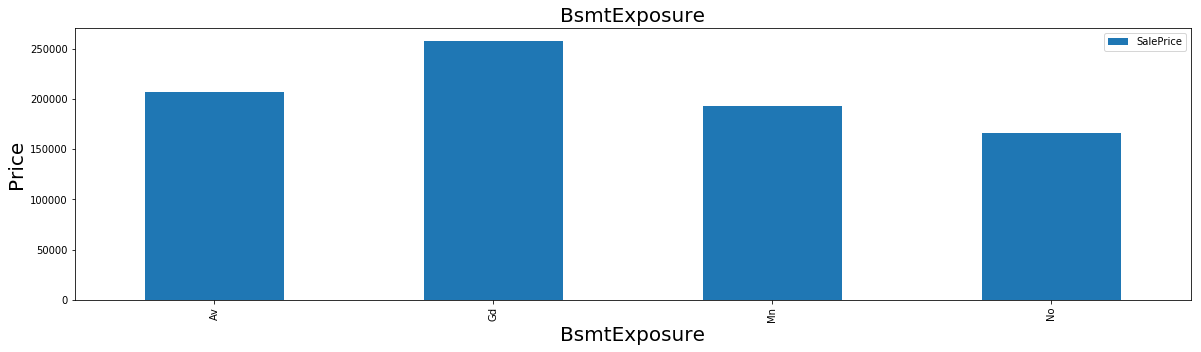

In [698]:
chart_bar('BsmtExposure')

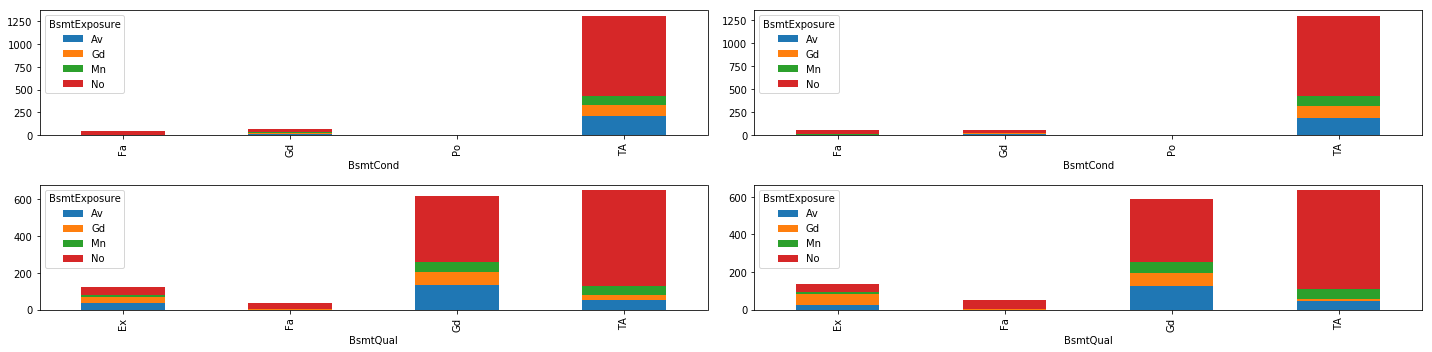

In [699]:
fig, axes = plt.subplots(2,2)
train_raw[['BsmtCond', 'BsmtExposure']].groupby(['BsmtCond', 'BsmtExposure']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (20,5), ax = axes[0][0])
test_raw[['BsmtCond', 'BsmtExposure']].groupby(['BsmtCond', 'BsmtExposure']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (20,5), ax = axes[0][1])
train_raw[['BsmtQual', 'BsmtExposure']].groupby(['BsmtQual', 'BsmtExposure']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (20,5), ax = axes[1][0])
test_raw[['BsmtQual', 'BsmtExposure']].groupby(['BsmtQual', 'BsmtExposure']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (20,5), ax = axes[1][1])
plt.tight_layout()

In [700]:
for data in train_test_data:
    data['BsmtExposure'] = data['BsmtExposure'].fillna('No')
mapping('BsmtExposure')

Information of BsmtExposure 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [4 1 2 3]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  [4 1 2 3]




{nan: 0, 'Gd': 1, 'Mn': 2, 'Av': 3, 'No': 4}

### 33. BsmtFinType1
Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [701]:
train_test_info('BsmtFinType1')

Information of BsmtFinType1 

Train
Number of null :  37
Number of value unique :  7
Kind of value unique :  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


Test
Number of null :  42
Number of value unique :  7
Kind of value unique :  ['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' nan]




### 33-1. Fill NaN

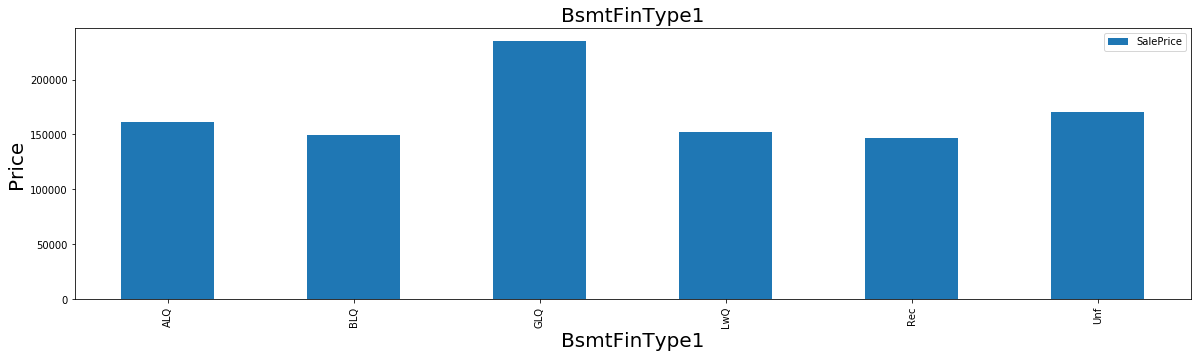

In [702]:
chart_bar('BsmtFinType1')

In [703]:
def compare(feature1, feature2):
    train_raw[[feature1, feature2]].groupby([feature1, feature2]).size().unstack().plot(kind = 'bar', figsize = (20,5), stacked = True, title = feature1)

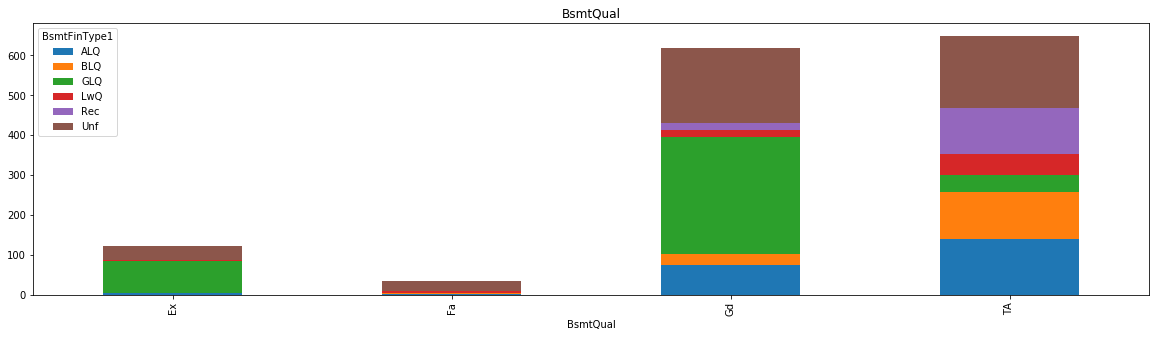

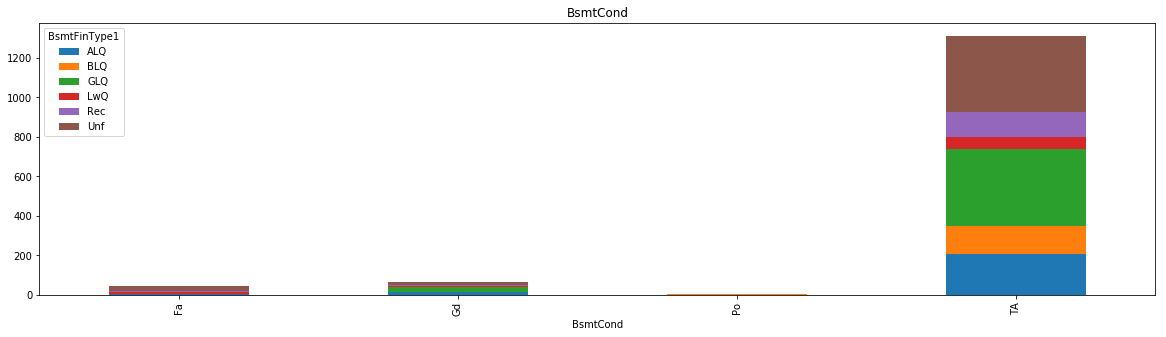

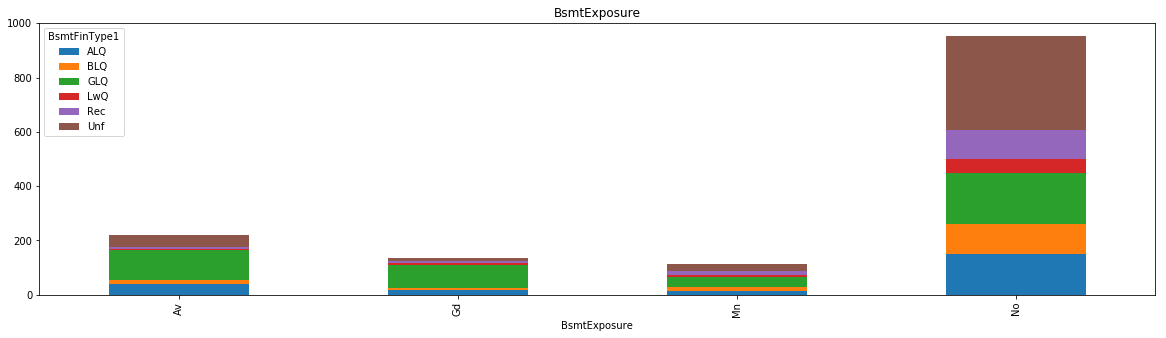

In [704]:
plt.figure()
compare('BsmtQual', 'BsmtFinType1')
compare('BsmtCond', 'BsmtFinType1')
compare('BsmtExposure', 'BsmtFinType1')

In [705]:
corr = train.copy()
mapping2('BsmtFinType1')
df = corr.corr()
df['BsmtFinType1'].sort_values(ascending = False)

BsmtFinType1     1.000000
BsmtQual         0.250908
TotalBsmtSF      0.244909
BsmtFinSF1       0.243100
BsmtFullBath     0.232023
YearRemodAdd     0.203865
GarageYrBlt      0.197062
OverallQual      0.196113
SalePrice        0.186067
YearBuilt        0.165004
Foundation       0.146322
GarageCars       0.144912
GarageArea       0.125311
WoodDeckSF       0.114760
BsmtFinSF2       0.111649
HouseStyle       0.107526
FullBath         0.105430
1stFlrSF         0.092897
GrLivArea        0.082206
HalfBath         0.070798
Fireplaces       0.064956
MSSubClass       0.063216
BldgType         0.061660
OpenPorchSF      0.061165
MasVnrArea       0.059294
LotShape         0.057095
BsmtHalfBath     0.055589
BsmtCond         0.055433
OverallCond      0.049296
Alley            0.038243
                   ...   
LandContour      0.022427
Exterior2nd      0.018591
Condition2       0.018012
PoolArea         0.017996
2ndFlrSF         0.015899
LandSlope        0.014597
MasVnrType       0.011813
LotArea     

In [706]:
for data in train_test_data:
    data.drop('BsmtFinType1', axis = 1, inplace = True)

### 34. BsmtFinSF1
Type 1 finished square feet

In [707]:
train_test_info('BsmtFinSF1')

Information of BsmtFinSF1 

Train
Number of null :  0
Number of value unique :  637
Kind of value unique :  [ 706  978  486  216  655  732 1369  859    0  851  906  998  737  733
  578  646  504  840  188  234 1218 1277 1018 1153 1213  731  643  967
  747  280  179  456 1351   24  763  182  104 1810  384  490  649  632
  941  739  912 1013  603 1880  565  320  462  228  336  448 1201   33
  588  600  713 1046  648  310 1162  520  108  569 1200  224  705  444
  250  984   35  774  419  170 1470  938  570  300  120  116  512  567
  445  695  405 1005  668  821  432 1300  507  679 1332  209  680  716
 1400  416  429  222   57  660 1016  370  351  379 1288  360  639  495
  288 1398  477  831 1904  436  352  611 1086  297  626  560  390  566
 1126 1036 1088  641  617  662  312 1065  787  468   36  822  378  946
  341   16  550  524   56  321  842  689  625  358  402   94 1078  329
  929  697 1573  270  922  503 1334  361  672  506  714  403  751  226
  620  546  392  421  905  904  430  614

### 34-1. Fill NaN

In [708]:
test['BsmtFinSF1'] = round(test['BsmtFinSF1'].fillna(train['BsmtFinSF1'].mean()))
train_test_info('BsmtFinSF1')

Information of BsmtFinSF1 

Train
Number of null :  0
Number of value unique :  637
Kind of value unique :  [ 706  978  486  216  655  732 1369  859    0  851  906  998  737  733
  578  646  504  840  188  234 1218 1277 1018 1153 1213  731  643  967
  747  280  179  456 1351   24  763  182  104 1810  384  490  649  632
  941  739  912 1013  603 1880  565  320  462  228  336  448 1201   33
  588  600  713 1046  648  310 1162  520  108  569 1200  224  705  444
  250  984   35  774  419  170 1470  938  570  300  120  116  512  567
  445  695  405 1005  668  821  432 1300  507  679 1332  209  680  716
 1400  416  429  222   57  660 1016  370  351  379 1288  360  639  495
  288 1398  477  831 1904  436  352  611 1086  297  626  560  390  566
 1126 1036 1088  641  617  662  312 1065  787  468   36  822  378  946
  341   16  550  524   56  321  842  689  625  358  402   94 1078  329
  929  697 1573  270  922  503 1334  361  672  506  714  403  751  226
  620  546  392  421  905  904  430  614

### 35. BsmtFinType2
Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [709]:
train_test_info('BsmtFinType2')

Information of BsmtFinType2 

Train
Number of null :  38
Number of value unique :  7
Kind of value unique :  ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


Test
Number of null :  42
Number of value unique :  7
Kind of value unique :  ['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' nan]




### 35-1. Fill NaN

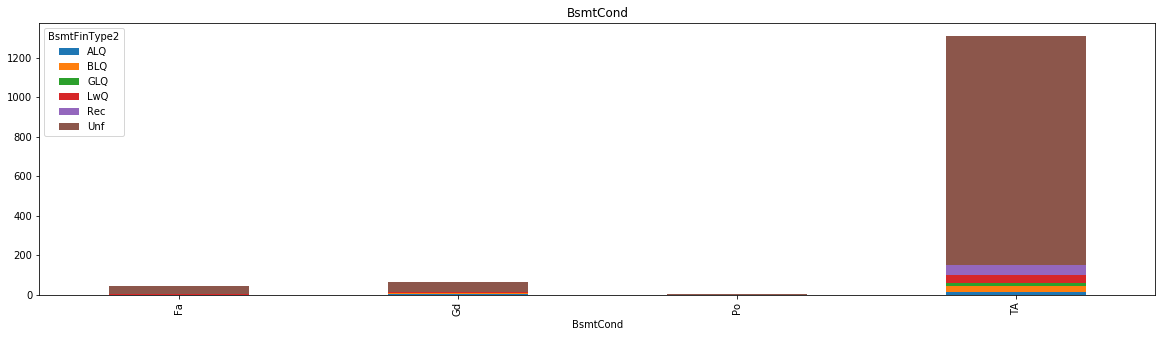

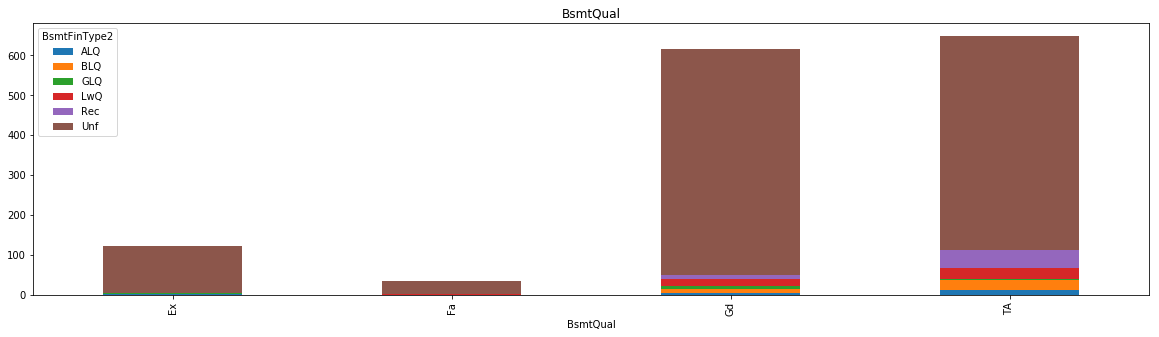

In [710]:
plt.figure()
compare('BsmtCond', 'BsmtFinType2')
compare('BsmtQual', 'BsmtFinType2')

In [711]:
for data in train_test_data:
    data['BsmtFinType2'] = data['BsmtFinType2'].fillna('Unf')
mapping('BsmtFinType2')

Information of BsmtFinType2 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  [3 1 5 2 6 4]


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  [6 3 2 1 4 5]




{nan: 0, 'BLQ': 1, 'Rec': 2, 'Unf': 3, 'GLQ': 4, 'ALQ': 5, 'LwQ': 6}

### 36. BsmtFinSF2
Type 2 finished square feet

In [712]:
train_test_info('BsmtFinSF2')

Information of BsmtFinSF2 

Train
Number of null :  0
Number of value unique :  144
Kind of value unique :  [   0   32  668  486   93  491  506  712  362   41  169  869  150  670
   28 1080  181  768  215  374  208  441  184  279  306  180  580  690
  692  228  125 1063  620  175  820 1474  264  479  147  232  380  544
  294  258  121  391  531  344  539  713  210  311 1120  165  532   96
  495  174 1127  139  202  645  123  551  219  606  612  480  182  132
  336  468  287   35  499  723  119   40  117  239   80  472   64 1057
  127  630  128  377  764  345 1085  435  823  500  290  324  634  411
  841 1061  466  396  354  149  193  273  465  400  682  557  230  106
  791  240  547  469  177  108  600  492  211  168 1031  438  375  144
   81  906  608  276  661   68  173  972  105  420  546  334  352  872
  110  627  163 1029]


Test
Number of null :  1
Number of value unique :  162
Kind of value unique :  [ 144.    0.   78.  859.  981.   42.   46.  162.  174.  350.  263. 1073.
   12.

### 36-1. Fill NaN

In [713]:
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(round(train['BsmtFinSF2'].mean()))
train_test_info('BsmtFinSF2')

Information of BsmtFinSF2 

Train
Number of null :  0
Number of value unique :  144
Kind of value unique :  [   0   32  668  486   93  491  506  712  362   41  169  869  150  670
   28 1080  181  768  215  374  208  441  184  279  306  180  580  690
  692  228  125 1063  620  175  820 1474  264  479  147  232  380  544
  294  258  121  391  531  344  539  713  210  311 1120  165  532   96
  495  174 1127  139  202  645  123  551  219  606  612  480  182  132
  336  468  287   35  499  723  119   40  117  239   80  472   64 1057
  127  630  128  377  764  345 1085  435  823  500  290  324  634  411
  841 1061  466  396  354  149  193  273  465  400  682  557  230  106
  791  240  547  469  177  108  600  492  211  168 1031  438  375  144
   81  906  608  276  661   68  173  972  105  420  546  334  352  872
  110  627  163 1029]


Test
Number of null :  0
Number of value unique :  162
Kind of value unique :  [ 144.    0.   78.  859.  981.   42.   46.  162.  174.  350.  263. 1073.
   12.

### 37. BsmtUnfSF
Unfinished square feet of basement area

In [714]:
train_test_info('BsmtUnfSF')

Information of BsmtUnfSF 

Train
Number of null :  0
Number of value unique :  780
Kind of value unique :  [ 150  284  434  540  490   64  317  216  952  140  134  177  175 1494
  520  832  426    0  468  525 1158  637 1777  200  204 1566  180  486
  207  649 1228 1234  380  408 1117 1097   84  326  445  383  167  465
 1296   83 1632  736  192  612  816   32  935  321  860 1410  148  217
  530 1346  576  318 1143 1035  440  747  701  343  280  404  840  724
  295 1768  448   36 1530 1065  384 1288  684 1013  402  635  163  168
  176  370  350  381  410  741 1226 1053  641  516  793 1139  550  905
  104  310  252 1125  203  728  732  510  899 1362   30  958  556  413
  479  297  658  262  891 1304  519 1907  336  107  432  403  811  396
  970  506  884  400  896  253  409   93 1200  572  774  769 1335  340
  882  779  112  470  294 1686  360  441  354  700  725  320  554  312
  968  504 1107  577  660   99  871  474  289  600  755  625 1121  276
  186 1424 1140  375   92  305 1176   78 

### 37-1. Fill NaN

In [715]:
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(round(train['BsmtUnfSF'].mean()))
train_test_info('BsmtUnfSF')

Information of BsmtUnfSF 

Train
Number of null :  0
Number of value unique :  780
Kind of value unique :  [ 150  284  434  540  490   64  317  216  952  140  134  177  175 1494
  520  832  426    0  468  525 1158  637 1777  200  204 1566  180  486
  207  649 1228 1234  380  408 1117 1097   84  326  445  383  167  465
 1296   83 1632  736  192  612  816   32  935  321  860 1410  148  217
  530 1346  576  318 1143 1035  440  747  701  343  280  404  840  724
  295 1768  448   36 1530 1065  384 1288  684 1013  402  635  163  168
  176  370  350  381  410  741 1226 1053  641  516  793 1139  550  905
  104  310  252 1125  203  728  732  510  899 1362   30  958  556  413
  479  297  658  262  891 1304  519 1907  336  107  432  403  811  396
  970  506  884  400  896  253  409   93 1200  572  774  769 1335  340
  882  779  112  470  294 1686  360  441  354  700  725  320  554  312
  968  504 1107  577  660   99  871  474  289  600  755  625 1121  276
  186 1424 1140  375   92  305 1176   78 

### 38. TotalBsmtSF
Total square feet of basement area

In [716]:
train_test_info('TotalBsmtSF')

Information of TotalBsmtSF 

Train
Number of null :  0
Number of value unique :  721
Kind of value unique :  [ 856 1262  920  756 1145  796 1686 1107  952  991 1040 1175  912 1494
 1253  832 1004    0 1114 1029 1158  637 1777 1060 1566  900 1704 1484
  520  649 1228 1234 1398 1561 1117 1097 1297 1057 1088 1350  840  938
 1150 1752 1434 1656  736  955  794  816 1842  384 1425  970  860 1410
  780  530 1370  576 1143 1947 1453  747 1304 2223  845 1086  462  672
 1768  440  896 1237 1563 1065 1288  684  612 1013  990 1235  876 1214
  824  680 1588  960  458  950 1610  741 1226 1053  641  789  793 1844
  994 1264 1809 1028  729 1092 1125 1673  728  732 1080 1199 1362 1078
  660 1008  924  992 1063 1267 1461 1907  928  864 1734  910 1490 1728
  715  884  969 1710  825 1602 1200  572  774 1392 1232 1572 1541  882
 1149  644 1617 1582  720 1064 1606 1202 1151 1052 2216  968  504 1188
 1593  853  725 1431  855 1726 1360  755 1713 1121 1196  617  848 1424
 1140 1100 1157 1212  689 1070 1436  68

### 38-1. Fill NaN

In [717]:
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(round(train['TotalBsmtSF'].mean()))
train_test_info('TotalBsmtSF')

Information of TotalBsmtSF 

Train
Number of null :  0
Number of value unique :  721
Kind of value unique :  [ 856 1262  920  756 1145  796 1686 1107  952  991 1040 1175  912 1494
 1253  832 1004    0 1114 1029 1158  637 1777 1060 1566  900 1704 1484
  520  649 1228 1234 1398 1561 1117 1097 1297 1057 1088 1350  840  938
 1150 1752 1434 1656  736  955  794  816 1842  384 1425  970  860 1410
  780  530 1370  576 1143 1947 1453  747 1304 2223  845 1086  462  672
 1768  440  896 1237 1563 1065 1288  684  612 1013  990 1235  876 1214
  824  680 1588  960  458  950 1610  741 1226 1053  641  789  793 1844
  994 1264 1809 1028  729 1092 1125 1673  728  732 1080 1199 1362 1078
  660 1008  924  992 1063 1267 1461 1907  928  864 1734  910 1490 1728
  715  884  969 1710  825 1602 1200  572  774 1392 1232 1572 1541  882
 1149  644 1617 1582  720 1064 1606 1202 1151 1052 2216  968  504 1188
 1593  853  725 1431  855 1726 1360  755 1713 1121 1196  617  848 1424
 1140 1100 1157 1212  689 1070 1436  68

### 39. Heating
Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace       

In [718]:
train_test_info('Heating')

Information of Heating 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  ['GasA' 'GasW' 'Grav' 'Wall']




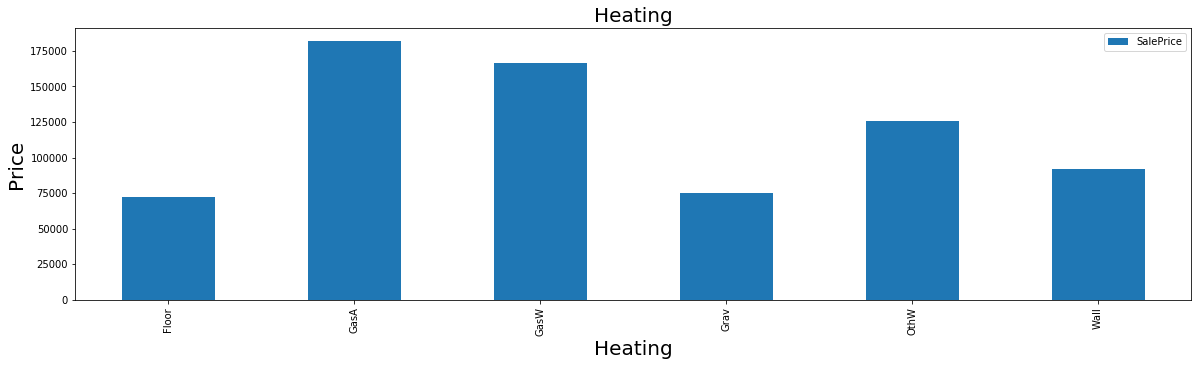

In [719]:
chart_bar('Heating')

In [720]:
mapping('Heating')

Information of Heating 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  [1 2 3 4 5 0]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  [1 2 3 4]




{'Floor': 0, 'GasA': 1, 'GasW': 2, 'Grav': 3, 'OthW': 5, 'Wall': 4}

### 40. HeatingQC
Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [721]:
train_test_info('HeatingQC')

Information of HeatingQC 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['Ex' 'Gd' 'TA' 'Fa' 'Po']


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['TA' 'Gd' 'Ex' 'Fa' 'Po']




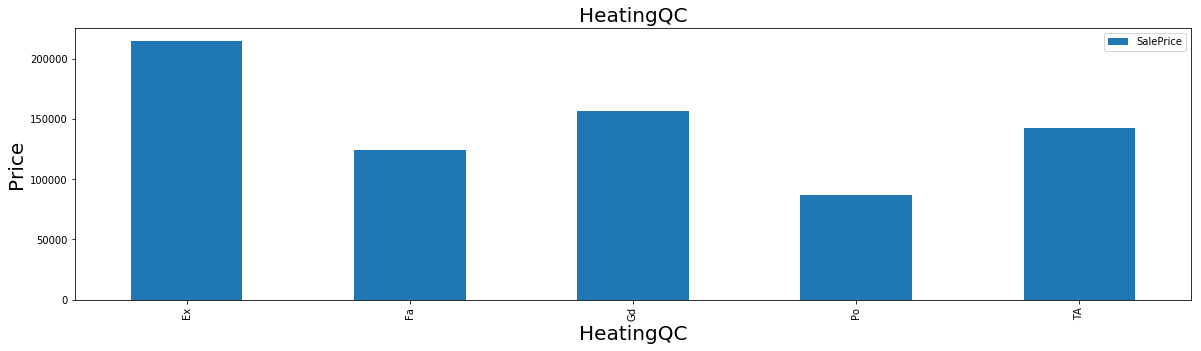

In [722]:
chart_bar('HeatingQC')

In [723]:
mapping('HeatingQC')

Information of HeatingQC 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  [3 2 0 1 4]


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  [0 2 3 1 4]




{'Ex': 3, 'Fa': 1, 'Gd': 2, 'Po': 4, 'TA': 0}

### 41. CentralAir
Central air conditioning

       N	No
       Y	Yes

In [724]:
train_test_info('CentralAir')

Information of CentralAir 

Train
Number of null :  0
Number of value unique :  2
Kind of value unique :  ['Y' 'N']


Test
Number of null :  0
Number of value unique :  2
Kind of value unique :  ['Y' 'N']




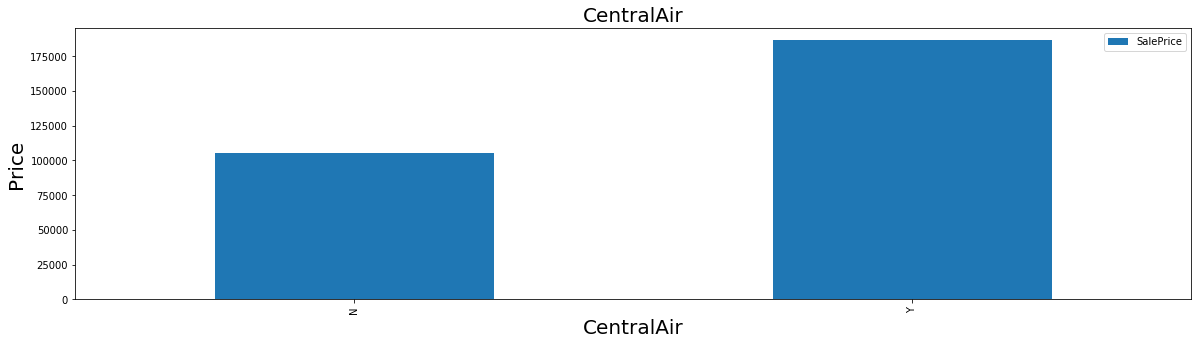

In [725]:
chart_bar('CentralAir')

In [726]:
mapping('CentralAir')

Information of CentralAir 

Train
Number of null :  0
Number of value unique :  2
Kind of value unique :  [1 0]


Test
Number of null :  0
Number of value unique :  2
Kind of value unique :  [1 0]




{'N': 0, 'Y': 1}

### 42. Electrical
Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [727]:
train_test_info('Electrical')

Information of Electrical 

Train
Number of null :  1
Number of value unique :  6
Kind of value unique :  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  ['SBrkr' 'FuseA' 'FuseF' 'FuseP']




### 42-1. Fill NaN

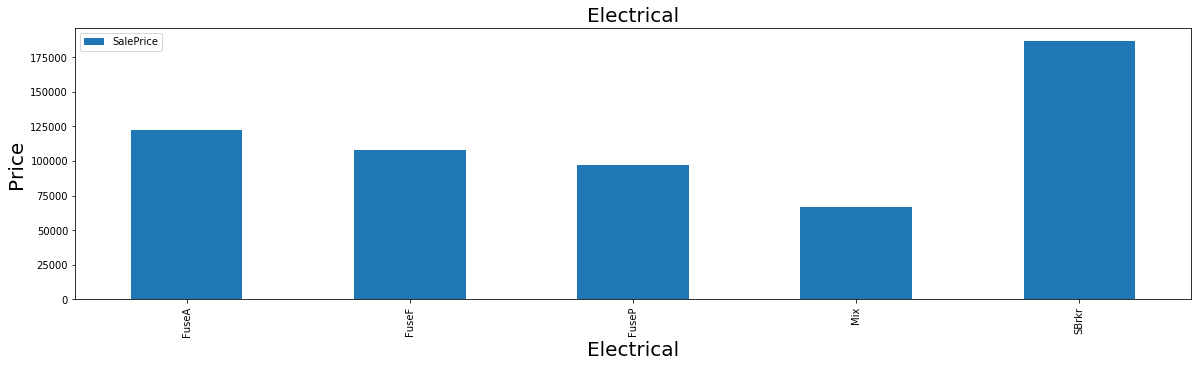

In [728]:
chart_bar('Electrical')

In [729]:
train.loc[train['Electrical'].isnull(), 'Electrical'] = train['Electrical'].value_counts().argmax()

In [730]:
train_test_info('Electrical')

Information of Electrical 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  ['SBrkr' 'FuseA' 'FuseF' 'FuseP']




In [731]:
mapping('Electrical')

Information of Electrical 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  [4 3 2 5 1]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  [4 2 3 5]




{nan: 0, 'Mix': 1, 'FuseA': 2, 'FuseF': 3, 'SBrkr': 4, 'FuseP': 5}

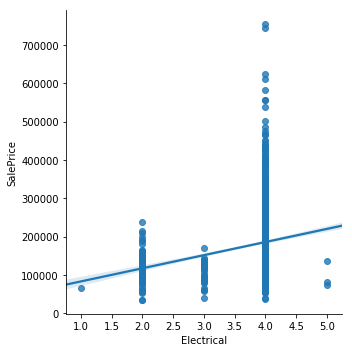

In [732]:
df = train[['Electrical', 'SalePrice']]
sns.lmplot(x = 'Electrical', y = 'SalePrice', data = df)

### 43. 1stFlrSF
First Floor square feet

In [733]:
train_test_info('1stFlrSF')

Information of 1stFlrSF 

Train
Number of null :  0
Number of value unique :  753
Kind of value unique :  [ 856 1262  920  961 1145  796 1694 1107 1022 1077 1040 1182  912 1494
 1253  854 1004 1296 1114 1339 1158 1108 1795 1060 1600  900 1704  520
  649 1228 1234 1700 1561 1132 1097 1297 1057 1152 1324 1328  884  938
 1150 1752 1518 1656  736  955  794  816 1842 1360 1425  983  860 1426
  780  581 1370  902 1143 2207 1479  747 1304 2223  845  885 1086  840
  526  952 1072 1768  682 1337 1563 1065  804 1301  684  612 1013  990
 1235  964 1260  905  680 1588  960  835 1225 1610  977 1535 1226 1053
 1047  789  997 1844 1216  774 1282 2259 1436  729 1092 1125 1699  728
  988  772 1080 1199 1586  958  660 1327 1721 1682 1214 1959  928  864
 1734  910 1501 1728  970  875  896  969 1710 1252 1200  572  991 1392
 1232 1572 1541  882 1149  808 1867 1707 1064 1362 1651 2158 1164 2234
  968  769  901 1340  936 1217 1224 1593 1549  725 1431  855 1726  929
 1713 1121 1279  865  848  720 1442 1696 1

In [734]:
train[['1stFlrSF', 'SalePrice']].corr()

,1stFlrSF,SalePrice
1stFlrSF,1.000000,0.605852
SalePrice,0.605852,1.000000


### 44. 2ndFlrSF
Second floor square feet

In [735]:
train_test_info('2ndFlrSF')

Information of 2ndFlrSF 

Train
Number of null :  0
Number of value unique :  417
Kind of value unique :  [ 854    0  866  756 1053  566  983  752 1142 1218  668 1320  631  716
  676  860 1519  530  808  977 1330  833  765  462  213  548  960  670
 1116  876  612 1031  881  790  755  592  939  520  639  656 1414  884
  729 1523  728  351  688  941 1032  848  836  475  739 1151  448  896
  524 1194  956 1070 1096  467  547  551  880  703  901  720  316 1518
  704 1178  754  601 1360  929  445  564  882  920  518  817 1257  741
  672 1306  504 1304 1100  730  689  591  888 1020  828  700  842 1286
  864  829 1092  709  844 1106  596  807  625  649  698  840  780  568
  795  648  975  702 1242 1818 1121  371  804  325  809 1200  871 1274
 1347 1332 1177 1080  695  167  915  576  605  862  495  403  838  517
 1427  784  711  468 1081  886  793  665  858  874  526  590  406 1157
  299  936  438 1098  766 1101 1028 1017 1254  378 1160  682  110  600
  678  834  384  512  930  868  224 1103  

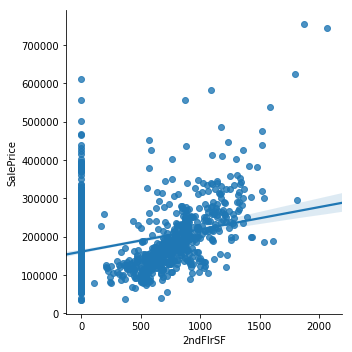

In [736]:
df = train[['2ndFlrSF', 'SalePrice']]
sns.lmplot('2ndFlrSF', 'SalePrice', data = df)

## 45. LowQualFinSF
Low quality finished square feet (all floors)

In [737]:
train_test_info('LowQualFinSF', sort = True)

Information of LowQualFinSF 

Train
Number of null :  0
Number of value unique :  24
Kind of value unique :  [  0  53  80 120 144 156 205 232 234 360 371 384 390 392 397 420 473 479
 481 513 514 515 528 572]


Test
Number of null :  0
Number of value unique :  15
Kind of value unique :  [   0   80  108  114  140  205  259  312  362  431  436  450  512  697
 1064]




### 46. GrLivArea
Above grade (ground) living area square feet

In [738]:
train_test_info('GrLivArea')

Information of GrLivArea 

Train
Number of null :  0
Number of value unique :  861
Kind of value unique :  [1710 1262 1786 1717 2198 1362 1694 2090 1774 1077 1040 2324  912 1494
 1253  854 1004 1296 1114 1339 2376 1108 1795 1060 1600  900 1704  520
 1317 1228 1234 1700 1561 2452 1097 1297 1057 1152 1324 1328  884  938
 1150 1752 2149 1656 1452  955 1470 1176  816 1842 1360 1425 1739 1720
 2945  780 1158 1111 1370 2034 2473 2207 1479  747 2287 2223  845 1718
 1086 1605  988  952 1285 1768 1230 2142 1337 1563 1065 1474 2417 1560
 1224 1526  990 1235  964 2291 1588  960  835 1225 1610 1732 1535 1226
 1818 1992 1047  789 1517 1844 1855 1430 2696 2259 2320 1458 1092 1125
 3222 1456 1123 1080 1199 1586  754  958  840 1348 1053 2157 2054 1327
 1721 1682 1214 1959 1852 1764  864 1734 1385 1501 1728 1709  875 2035
 1344  969 1993 1252 1200 1096 1968 1947 2462 1232 2668 1541  882 1616
 1355 1867 2161 1707 1382 1767 1651 2158 2060 1920 2234  968 1525 1802
 1340 2082 3608 1217 1593 2727 1431 1726 

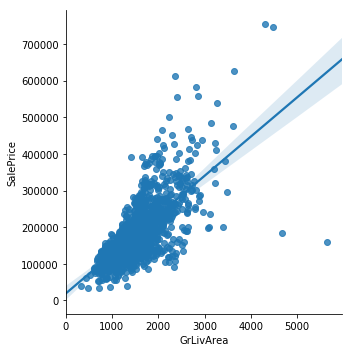

In [739]:
df = train[['GrLivArea', 'SalePrice']]
import seaborn as sns
sns.lmplot(x = 'GrLivArea', y = 'SalePrice', data = df)

### 47. BsmtFullBath
Basement full bathrooms

In [740]:
train_test_info('BsmtFullBath')

Information of BsmtFullBath 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [1 0 2 3]


Test
Number of null :  2
Number of value unique :  5
Kind of value unique :  [ 0.  1.  2.  3. nan]




### 47-1. Fill NaN

In [741]:
df = train[['BsmtFullBath', 'SalePrice']]
df.corr()

,BsmtFullBath,SalePrice
BsmtFullBath,1.000000,0.227122
SalePrice,0.227122,1.000000


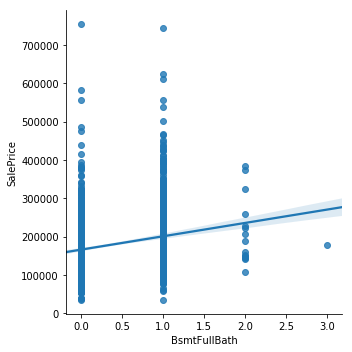

In [742]:
sns.lmplot('BsmtFullBath', 'SalePrice', data = df)

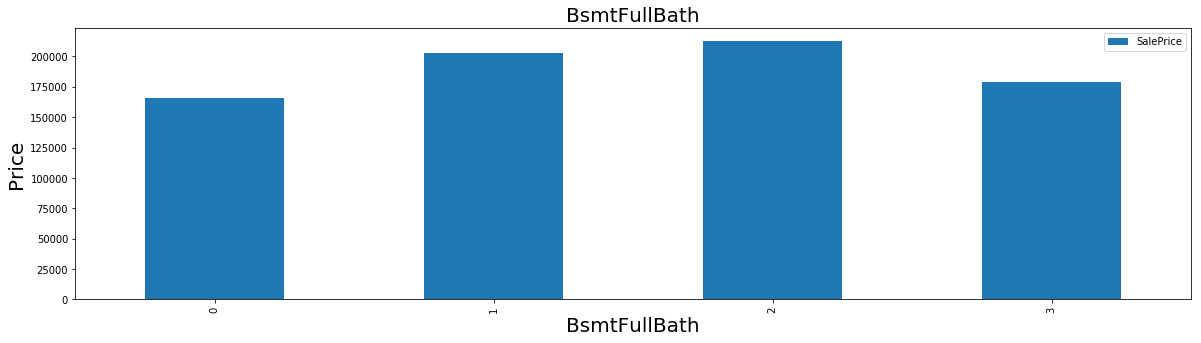

In [743]:
chart_bar('BsmtFullBath')

950.9614485981308

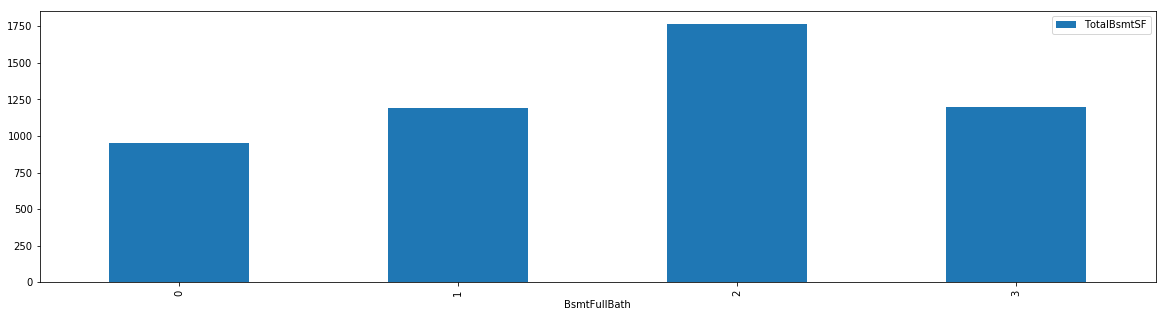

In [744]:
df = train_raw[['BsmtFullBath', 'TotalBsmtSF']].groupby('BsmtFullBath').mean()
df.plot(kind = 'bar', figsize = (20,5))
df['TotalBsmtSF'].iloc[0]

In [745]:
test.loc[(test['BsmtFullBath'].isnull()) & (test['TotalBsmtSF'] == 0), 'BsmtFullBath'] = 0

In [746]:
print("mean of Each BsmtFullBath's TotalBsmtSF")
print('0 :', df['TotalBsmtSF'].iloc[0])
print('1:', df['TotalBsmtSF'].iloc[1])
print('2:', df['TotalBsmtSF'].iloc[2])
print('3:', df['TotalBsmtSF'].iloc[3])

mean of Each BsmtFullBath's TotalBsmtSF
0 : 950.9614485981308
1: 1194.049319727891
2: 1768.2
3: 1200.0


In [747]:
test.loc[test['BsmtFullBath'].isnull(), 'BsmtFullBath'] = 0
mapping('BsmtFullBath')

Information of BsmtFullBath 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [1. 0. 2. 3.]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  [0. 1. 2. 3.]




{0: 0, 1: 1, 2: 2, 3: 3, nan: 4}

### 48. BsmtHalfBath
Basement half bathrooms

In [748]:
train_test_info('BsmtHalfBath')

Information of BsmtHalfBath 

Train
Number of null :  0
Number of value unique :  3
Kind of value unique :  [0 1 2]


Test
Number of null :  2
Number of value unique :  4
Kind of value unique :  [ 0.  1. nan  2.]




### 48-1. Fill NaN

In [749]:
test.loc[test['BsmtHalfBath'].isnull(), 'BsmtHalfBath'] = 0
mapping('BsmtHalfBath')

Information of BsmtHalfBath 

Train
Number of null :  0
Number of value unique :  3
Kind of value unique :  [0. 1. 2.]


Test
Number of null :  0
Number of value unique :  3
Kind of value unique :  [0. 1. 2.]




{0: 0, 1: 1, 2: 2, nan: 3}

### 49. FullBath
Full bathrooms above grade

In [750]:
train_test_info('FullBath')

Information of FullBath 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [2 1 3 0]


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  [1 2 3 4 0]




In [751]:
mapping('FullBath')

Information of FullBath 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [2 1 3 0]


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  [1 2 3 4 0]




{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

## 50. HalfBath
Half baths above grade

In [752]:
train_test_info('HalfBath')

Information of HalfBath 

Train
Number of null :  0
Number of value unique :  3
Kind of value unique :  [1 0 2]


Test
Number of null :  0
Number of value unique :  3
Kind of value unique :  [0 1 2]




In [753]:
mapping('HalfBath')

Information of HalfBath 

Train
Number of null :  0
Number of value unique :  3
Kind of value unique :  [1 0 2]


Test
Number of null :  0
Number of value unique :  3
Kind of value unique :  [0 1 2]




{0: 0, 1: 1, 2: 2}

### 51. BedroomAbvGr
Bedrooms above grade (does NOT include basement bedrooms)

In [754]:
train_test_info('BedroomAbvGr')

Information of BedroomAbvGr 

Train
Number of null :  0
Number of value unique :  8
Kind of value unique :  [3 4 1 2 0 5 6 8]


Test
Number of null :  0
Number of value unique :  7
Kind of value unique :  [2 3 4 1 6 5 0]




In [755]:
mapping('BedroomAbvGr')

Information of BedroomAbvGr 

Train
Number of null :  0
Number of value unique :  8
Kind of value unique :  [3 4 1 2 0 5 6 7]


Test
Number of null :  0
Number of value unique :  7
Kind of value unique :  [2 3 4 1 6 5 0]




{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 8: 7}

### 52. KitchenAbvGr
Kitchens above grade

In [756]:
train_test_info('KitchenAbvGr')

Information of KitchenAbvGr 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [1 2 3 0]


Test
Number of null :  0
Number of value unique :  3
Kind of value unique :  [1 2 0]




In [757]:
mapping('KitchenAbvGr')

Information of KitchenAbvGr 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [1 2 3 0]


Test
Number of null :  0
Number of value unique :  3
Kind of value unique :  [1 2 0]




{0: 0, 1: 1, 2: 2, 3: 3}

### 53. KitchenQual
Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [758]:
train_test_info('KitchenQual')

Information of KitchenQual 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  ['Gd' 'TA' 'Ex' 'Fa']


Test
Number of null :  1
Number of value unique :  5
Kind of value unique :  ['TA' 'Gd' 'Ex' 'Fa' nan]




### 53-1. Fill NaN

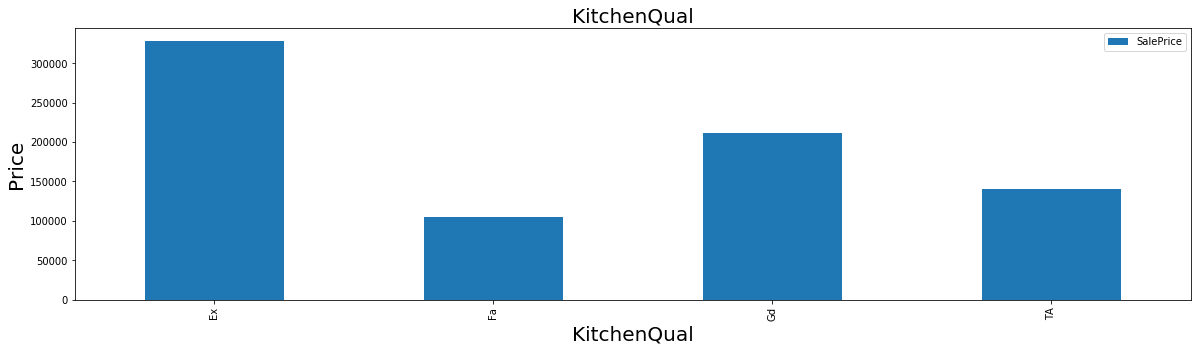

In [759]:
chart_bar('KitchenQual')

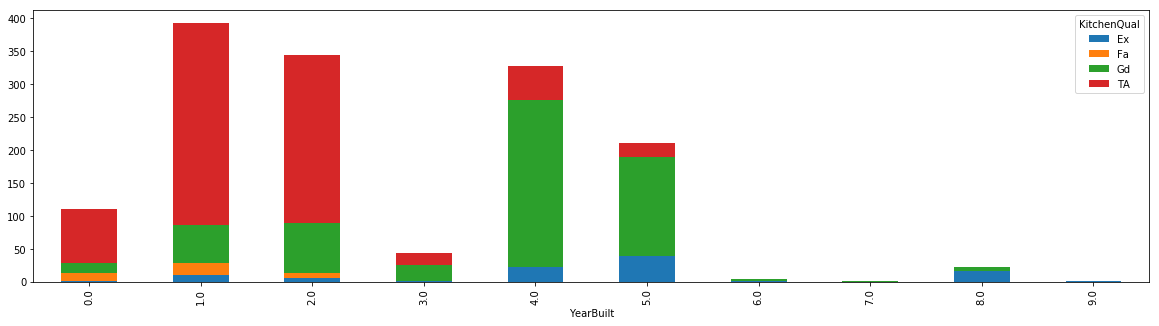

In [760]:
train[['YearBuilt', 'KitchenQual']].groupby(['YearBuilt', 'KitchenQual']).size().unstack().plot(kind = 'bar', figsize = (20,5), stacked = True)

In [761]:
test.loc[test['KitchenQual'].isnull(), 'KitchenQual'] = 'TA'
mapping('KitchenQual')

Information of KitchenQual 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [3 1 4 2]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  [1 3 4 2]




{nan: 0, 'TA': 1, 'Fa': 2, 'Gd': 3, 'Ex': 4}

### 54. TotRmsAbvGrd
Total rooms above grade (does not include bathrooms)

In [762]:
train_test_info('TotRmsAbvGrd')

Information of TotRmsAbvGrd 

Train
Number of null :  0
Number of value unique :  12
Kind of value unique :  [ 8  6  7  9  5 11  4 10 12  3  2 14]


Test
Number of null :  0
Number of value unique :  12
Kind of value unique :  [ 5  6  7  4 10  8  9  3 12 11 13 15]




Information of TotRmsAbvGrd 

Train
Number of null :  0
Number of value unique :  12
Kind of value unique :  [ 6  4  5  7  3  9  2  8 10  1  0 12]


Test
Number of null :  0
Number of value unique :  12
Kind of value unique :  [ 3  4  5  2  8  6  7  1 10  9 11 13]




{2: 0,
 3: 1,
 4: 2,
 5: 3,
 6: 4,
 7: 5,
 8: 6,
 9: 7,
 10: 8,
 11: 9,
 12: 10,
 13: 11,
 14: 12,
 15: 13}

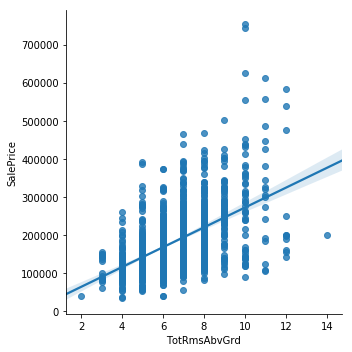

In [763]:
df = train[['TotRmsAbvGrd', 'SalePrice']]
sns.lmplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = df)
mapping('TotRmsAbvGrd')

### 55. Functional
Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [764]:
train_test_info('Functional')

Information of Functional 

Train
Number of null :  0
Number of value unique :  7
Kind of value unique :  ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


Test
Number of null :  2
Number of value unique :  8
Kind of value unique :  ['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2' nan]




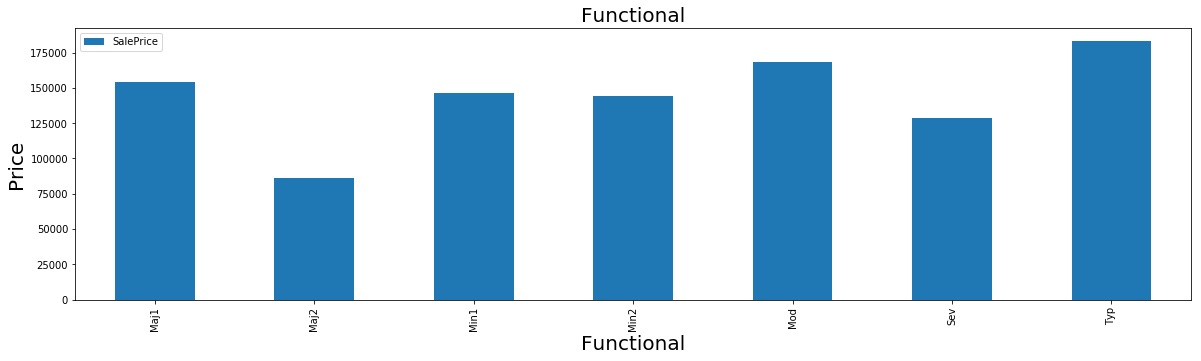

In [765]:
chart_bar('Functional')

### 55. Fill NaN

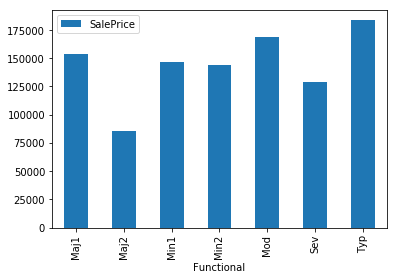

In [766]:
train[['Functional', 'SalePrice']].groupby(['Functional']).mean().plot(kind = 'bar')

In [767]:
train['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [768]:
test['Functional'].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [769]:
test['Functional'] = test['Functional'].fillna('Typ')
train_test_info('Functional')
mapping('Functional')

Information of Functional 

Train
Number of null :  0
Number of value unique :  7
Kind of value unique :  ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


Test
Number of null :  0
Number of value unique :  7
Kind of value unique :  ['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2']


Information of Functional 

Train
Number of null :  0
Number of value unique :  7
Kind of value unique :  [3 6 5 4 7 1 2]


Test
Number of null :  0
Number of value unique :  7
Kind of value unique :  [3 4 6 7 5 2 1]




{nan: 0,
 'Maj2': 1,
 'Sev': 2,
 'Typ': 3,
 'Min2': 4,
 'Maj1': 5,
 'Min1': 6,
 'Mod': 7}

### 56. Fireplaces
Number of fireplaces

In [770]:
train_test_info('Fireplaces')
mapping('Fireplaces')

Information of Fireplaces 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [0 1 2 3]


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  [0 1 2 3 4]


Information of Fireplaces 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [0 1 2 3]


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  [0 1 2 3 4]




{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

### 57. FireplaceQu
Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [771]:
train_test_info('FireplaceQu')

Information of FireplaceQu 

Train
Number of null :  690
Number of value unique :  6
Kind of value unique :  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


Test
Number of null :  730
Number of value unique :  6
Kind of value unique :  [nan 'TA' 'Gd' 'Po' 'Fa' 'Ex']




### 57-1. Fill NaN

In [772]:
train.loc[(train['FireplaceQu'].isnull()) & (train['Fireplaces'] != 0)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [773]:
test.loc[(train['FireplaceQu'].isnull()) & (train['Fireplaces'] != 0)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [774]:
for data in train_test_data:
    data.loc[data['Fireplaces'] == 0, 'FireplaceQu'] = 'NO'

In [775]:
train_test_info('FireplaceQu')
mapping('FireplaceQu')

Information of FireplaceQu 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  ['NO' 'TA' 'Gd' 'Fa' 'Ex' 'Po']


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  ['NO' 'TA' 'Gd' 'Po' 'Fa' 'Ex']


Information of FireplaceQu 

Train
Number of null :  690
Number of value unique :  6
Kind of value unique :  [nan  1.  3.  2.  4.  5.]


Test
Number of null :  730
Number of value unique :  6
Kind of value unique :  [nan  1.  3.  5.  2.  4.]




{nan: 0, 'TA': 1, 'Fa': 2, 'Gd': 3, 'Ex': 4, 'Po': 5}

In [776]:
train.loc[train['FireplaceQu'].isnull(), 'FireplaceQu'] = 'zero'
test.loc[test['FireplaceQu'].isnull(), 'FireplaceQu'] = 'zero'

In [777]:
train_test_info('FireplaceQu')

Information of FireplaceQu 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  ['zero' 1.0 3.0 2.0 4.0 5.0]


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  ['zero' 1.0 3.0 5.0 2.0 4.0]




In [778]:
for data in train_test_data:
    data['FireplaceQu'] = data['FireplaceQu'].replace({'zero' : 0})

In [779]:
train_test_info('FireplaceQu')

Information of FireplaceQu 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  [0. 1. 3. 2. 4. 5.]


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  [0. 1. 3. 5. 2. 4.]




### 58. GarageType
Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [780]:
train_test_info('GarageType')

Information of GarageType 

Train
Number of null :  81
Number of value unique :  7
Kind of value unique :  ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']


Test
Number of null :  76
Number of value unique :  7
Kind of value unique :  ['Attchd' 'Detchd' 'BuiltIn' nan 'Basment' '2Types' 'CarPort']




### 58-1. Fill NaN

In [781]:
train['GarageType'].value_counts().argmax()

'Attchd'

In [782]:
for data in train_test_data:
    data['GarageType'] = data['GarageType'].fillna('Attchd')
mapping('GarageType')

Information of GarageType 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  [5 6 4 2 3 1]


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  [5 6 4 3 1 2]




{nan: 0,
 '2Types': 1,
 'CarPort': 2,
 'Basment': 3,
 'BuiltIn': 4,
 'Attchd': 5,
 'Detchd': 6}

### 59. GarageYrBlt
Year garage was built

In [783]:
train_test_info('GarageYrBlt')

Information of GarageYrBlt 

Train
Number of null :  81
Number of value unique :  98
Kind of value unique :  [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]


Test
Number of null :  78
Number of value unique :  98
Kind of value unique :  [1961. 1958. 1997. 1998. 1992. 1993. 1990. 1970. 1999. 1971. 1975. 2009.
 2005. 2003. 2002. 2006. 2004. 1920. 1974. 2000. 2010. 1967. 1978. 1966.
 1964.   nan 1994. 1949. 1959. 1956. 1952. 1955. 1989. 1950. 1960.

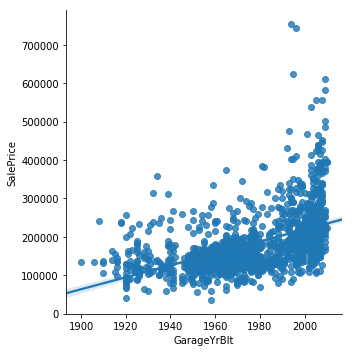

In [784]:
df = train[['GarageYrBlt', 'SalePrice']]
sns.lmplot('GarageYrBlt', 'SalePrice', data = df)

### 59-1. Fill NaN

In [785]:
train['GarageYrBlt'].value_counts().argmax()

2005.0

In [786]:
for data in train_test_data:
    data['GarageYrBlt'] = data['GarageYrBlt'].fillna(2005.0)

### 60. GarageFinish
Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [787]:
train_test_info('GarageFinish')

Information of GarageFinish 

Train
Number of null :  81
Number of value unique :  4
Kind of value unique :  ['RFn' 'Unf' 'Fin' nan]


Test
Number of null :  78
Number of value unique :  4
Kind of value unique :  ['Unf' 'Fin' 'RFn' nan]




### 60-1. Fill NaN

In [788]:
for data in train_test_data:
    data['GarageFinish'] = data['GarageFinish'].fillna(train['GarageFinish'].value_counts().argmax())
mapping('GarageFinish')

Information of GarageFinish 

Train
Number of null :  0
Number of value unique :  3
Kind of value unique :  [1 2 3]


Test
Number of null :  0
Number of value unique :  3
Kind of value unique :  [2 3 1]




{nan: 0, 'RFn': 1, 'Unf': 2, 'Fin': 3}

### 61. GarageCars
Size of garage in car capacity

In [789]:
train_test_info('GarageCars')

Information of GarageCars 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  [2 3 1 0 4]


Test
Number of null :  1
Number of value unique :  7
Kind of value unique :  [ 1.  2.  3.  0.  4.  5. nan]




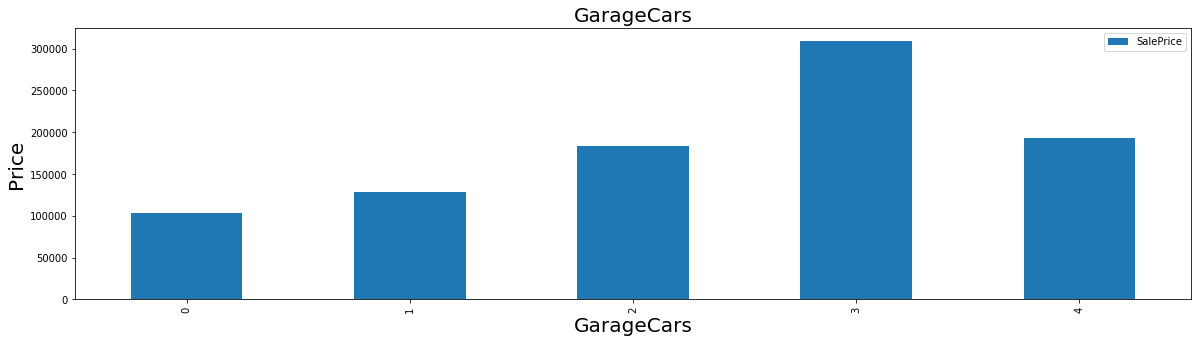

In [790]:
chart_bar('GarageCars')

### 61-1. Fill NaN

In [791]:
train[['GarageCars', 'GarageArea']].groupby('GarageCars').mean()

,GarageArea
GarageCars,
0,0.000000
1,300.517615
2,519.797330
3,811.574586
4,890.400000


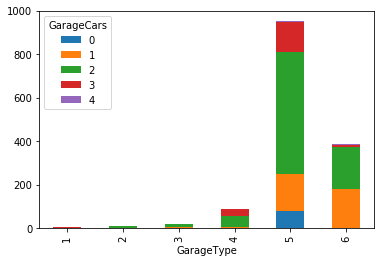

In [792]:
train[['GarageType', 'GarageCars']].groupby(['GarageType', 'GarageCars']).size().unstack().plot(kind = 'bar', stacked = True)

In [793]:
test.loc[test['GarageCars'].isnull(), ['GarageType','GrageArea', 'GarageCars']]

,GarageType,GrageArea,GarageCars
1116,6,NaN,NaN


In [794]:
test['GarageCars'] = test['GarageCars'].fillna(1)
train_test_info('GarageCars')

Information of GarageCars 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  [2 3 1 0 4]


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  [1. 2. 3. 0. 4. 5.]




### 62. GarageArea
Size of garage in square feet

In [795]:
train_test_info('GarageArea')

Information of GarageArea 

Train
Number of null :  0
Number of value unique :  441
Kind of value unique :  [ 548  460  608  642  836  480  636  484  468  205  384  736  352  840
  576  516  294  853  280  534  572  270  890  772  319  240  250  271
  447  556  691  672  498  246    0  440  308  504  300  670  826  386
  388  528  894  565  641  288  645  852  558  220  667  360  427  490
  379  297  283  509  405  758  461  400  462  420  432  506  684  472
  366  476  410  740  648  273  546  325  792  450  180  430  594  390
  540  264  530  435  453  750  487  624  471  318  766  660  470  720
  577  380  434  866  495  564  312  625  680  678  726  532  216  303
  789  511  616  521  451 1166  252  497  682  666  786  795  856  473
  398  500  349  454  644  299  210  431  438  675  968  721  336  810
  494  457  818  463  604  389  538  520  309  429  673  884  868  492
  413  924 1053  439  671  338  573  732  505  575  626  898  529  685
  281  539  418  588  282  375  683  843

In [796]:
train_raw['GarageArea'].dtype

dtype('int64')

In [797]:
train_raw[['GarageCars', 'GarageArea']].groupby(['GarageCars']).mean().iloc[1]

GarageArea    300.517615
Name: 1, dtype: float64

In [798]:
test['GarageArea'] = test['GarageArea'].fillna(300.517615)
train_test_info('GarageArea')

Information of GarageArea 

Train
Number of null :  0
Number of value unique :  441
Kind of value unique :  [ 548  460  608  642  836  480  636  484  468  205  384  736  352  840
  576  516  294  853  280  534  572  270  890  772  319  240  250  271
  447  556  691  672  498  246    0  440  308  504  300  670  826  386
  388  528  894  565  641  288  645  852  558  220  667  360  427  490
  379  297  283  509  405  758  461  400  462  420  432  506  684  472
  366  476  410  740  648  273  546  325  792  450  180  430  594  390
  540  264  530  435  453  750  487  624  471  318  766  660  470  720
  577  380  434  866  495  564  312  625  680  678  726  532  216  303
  789  511  616  521  451 1166  252  497  682  666  786  795  856  473
  398  500  349  454  644  299  210  431  438  675  968  721  336  810
  494  457  818  463  604  389  538  520  309  429  673  884  868  492
  413  924 1053  439  671  338  573  732  505  575  626  898  529  685
  281  539  418  588  282  375  683  843

### 63. GarageQual
Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [799]:
train_test_info('GarageQual')

Information of GarageQual 

Train
Number of null :  81
Number of value unique :  6
Kind of value unique :  ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']


Test
Number of null :  78
Number of value unique :  5
Kind of value unique :  ['TA' nan 'Fa' 'Gd' 'Po']




### 63-1. Fill NaN

In [800]:
for data in train_test_data:
    data['GarageQual'] = data['GarageQual'].fillna(train['GarageQual'].value_counts().argmax())
mapping('GarageQual')

Information of GarageQual 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  [1 2 3 4 5]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  [1 2 3 5]




{nan: 0, 'TA': 1, 'Fa': 2, 'Gd': 3, 'Ex': 4, 'Po': 5}

### 64. GarageCond
Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [801]:
train_test_info('GarageCond')

Information of GarageCond 

Train
Number of null :  81
Number of value unique :  6
Kind of value unique :  ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


Test
Number of null :  78
Number of value unique :  6
Kind of value unique :  ['TA' nan 'Fa' 'Gd' 'Po' 'Ex']




### 64-1. FIll NaN

In [802]:
for data in train_test_data:
    data['GarageCond'] = data['GarageCond'].fillna(train['GarageCond'].value_counts().argmax())
mapping('GarageCond')

Information of GarageCond 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  [1 2 3 5 4]


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  [1 2 3 5 4]




{nan: 0, 'TA': 1, 'Fa': 2, 'Gd': 3, 'Ex': 4, 'Po': 5}

### 65. PavedDrive
Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

In [803]:
train_test_info('PavedDrive')

Information of PavedDrive 

Train
Number of null :  0
Number of value unique :  3
Kind of value unique :  ['Y' 'N' 'P']


Test
Number of null :  0
Number of value unique :  3
Kind of value unique :  ['Y' 'N' 'P']




In [804]:
mapping('PavedDrive')

Information of PavedDrive 

Train
Number of null :  0
Number of value unique :  3
Kind of value unique :  [2 0 1]


Test
Number of null :  0
Number of value unique :  3
Kind of value unique :  [2 0 1]




{'N': 0, 'P': 1, 'Y': 2}

### 66. WoodDeckSF
Wood deck area in square feet

In [805]:
train_test_info('WoodDeckSF')

Information of WoodDeckSF 

Train
Number of null :  0
Number of value unique :  274
Kind of value unique :  [  0 298 192  40 255 235  90 147 140 160  48 240 171 100 406 222 288  49
 203 113 392 145 196 168 112 106 857 115 120  12 576 301 144 300  74 127
 232 158 352 182 180 166 224  80 367  53 188 105  24  98 276 200 409 239
 400 476 178 574 237 210 441 116 280 104  87 132 238 149 355  60 139 108
 351 209 216 248 143 365 370  58 197 263 123 138 333 250 292  95 262  81
 289 124 172 110 208 468 256 302 190 340 233 184 201 142 122 155 670 135
 495 536 306  64 364 353  66 159 146 296 125  44 215 264  88  89  96 414
 519 206 141 260 324 156 220  38 261 126  85 466 270  78 169 320 268  72
 349  42  35 326 382 161 179 103 253 148 335 176 390 328 312 185 269 195
  57 236 517 304 198 426  28 316 322 307 257 219 416 344 380  68 114 327
 165 187 181  92 228 245 503 315 241 303 133 403  36  52 265 207 150 290
 486 278  70 418 234  26 342  97 272 121 243 511 154 164 173 384 202  56
 321  86 194 421

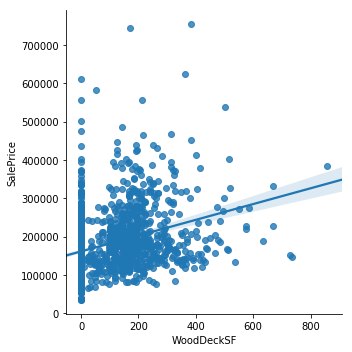

In [808]:
df = train[['WoodDeckSF', 'SalePrice']]
sns.lmplot(x = 'WoodDeckSF',y = 'SalePrice', data = df)

### 67. OpenPorchSF
Open porch area in square feet

In [806]:
train_test_info('OpenPorchSF')

Information of OpenPorchSF 

Train
Number of null :  0
Number of value unique :  202
Kind of value unique :  [ 61   0  42  35  84  30  57 204   4  21  33 213 112 102 154 159 110  90
  56  32  50 258  54  65  38  47  64  52 138 104  82  43 146  75  72  70
  49  11  36 151  29  94 101 199  99 234 162  63  68  46  45 122 184 120
  20  24 130 205 108  80  66  48  25  96 111 106  40 114   8 136 132  62
 228  60 238 260  27  74  16 198  26  83  34  55  22  98 172 119 208 105
 140 168  28  39 148  12  51 150 117 250  10  81  44 144 175 195 128  76
  17  59 214 121  53 231 134 192 123  78 187  85 133 176 113 137 125 523
 100 285  88 406 155  73 182 502 274 158 142 243 235 312 124 267 265  87
 288  23 152 341 116 160 174 247 291  18 170 156 166 129 418 240  77 364
 188 207  67  69 131 191  41 118 252 189 282 135  95 224 169 319  58  93
 244 185 200  92 180 263 304 229 103 211 287 292 241 547  91  86 262 210
 141  15 126 236]


Test
Number of null :  0
Number of value unique :  203
Kind of value

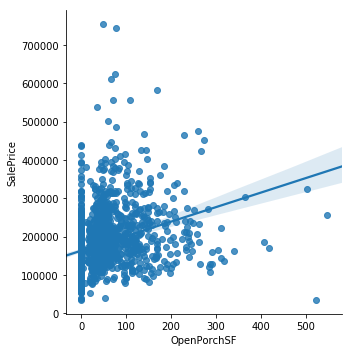

In [809]:
df = train[['OpenPorchSF', 'SalePrice']]
sns.lmplot(x = 'OpenPorchSF', y = 'SalePrice', data = df)

### 68. EnclosedPorch
Enclosed porch area in square feet

In [807]:
train_test_info('EnclosedPorch')

Information of EnclosedPorch 

Train
Number of null :  0
Number of value unique :  120
Kind of value unique :  [  0 272 228 205 176  87 172 102  37 144  64 114 202 128 156  44  77 192
 140 180 183  39 184  40 552  30 126  96  60 150 120 112 252  52 224 234
 244 268 137  24 108 294 177 218 242  91 160 130 169 105  34 248 236  32
  80 115 291 116 158 210  36 200  84 148 136 240  54 100 189 293 164 216
 239  67  90  56 129  98 143  70 386 154 185 134 196 264 275 230 254  68
 194 318  48  94 138 226 174  19 170 220 214 280 190 330 208 145 259  81
  42 123 162 286 168  20 301 198 221 212  50  99]


Test
Number of null :  0
Number of value unique :  131
Kind of value unique :  [   0   80  186  120  150  205  113  135  126  334  246   18   60   41
  128   35   48   32  364  112  248  168   45  239   52   56   36   86
  265   64  280  222  209  218   84  264  260  203  140  100  134  432
  156   42   40  169  176  148  244   25   81  160  238   94   98   51
   34  105  213  102  288   24   90 

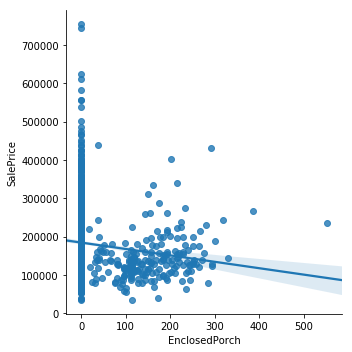

In [810]:
df = train[['EnclosedPorch', 'SalePrice']]
sns.lmplot(x = 'EnclosedPorch', y = 'SalePrice', data = df)

### 69. 3SsnPorch
Three season porch area in square feet

In [812]:
train_test_info('3SsnPorch')

Information of 3SsnPorch 

Train
Number of null :  0
Number of value unique :  20
Kind of value unique :  [  0 320 407 130 180 168 140 508 238 245 196 144 182 162  23 216  96 153
 290 304]


Test
Number of null :  0
Number of value unique :  13
Kind of value unique :  [  0 224 255 225 360 150 153 174 120 219 176  86 323]




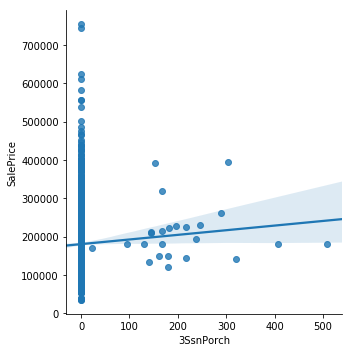

In [813]:
df = train[['3SsnPorch', 'SalePrice']]
sns.lmplot(x = '3SsnPorch', y = 'SalePrice', data = df)

### 70. ScreenPorch
Screen porch area in square feet

In [815]:
train_test_info('ScreenPorch')

Information of ScreenPorch 

Train
Number of null :  0
Number of value unique :  76
Kind of value unique :  [  0 176 198 291 252  99 184 168 130 142 192 410 224 266 170 154 153 144
 128 259 160 271 234 374 185 182  90 396 140 276 180 161 145 200 122  95
 120  60 126 189 260 147 385 287 156 100 216 210 197 204 225 152 175 312
 222 265 322 190 233  63  53 143 273 288 263  80 163 116 480 178 440 155
 220 119 165  40]


Test
Number of null :  0
Number of value unique :  75
Kind of value unique :  [120   0 144 256 216 204 160 240 148 168 266 166 200 155 108 490 156 196
 121  92 288 342 255 111 112 231 182 140 110 117 195 115 141 208 192  94
 164  95  64 576 227 161 100 221 171 135 322 174 175 180 217 201 109 165
 225 150  84 126 116 153 228 145 138  88 280 123 210 224 264 270 142 162
 348 113 104]




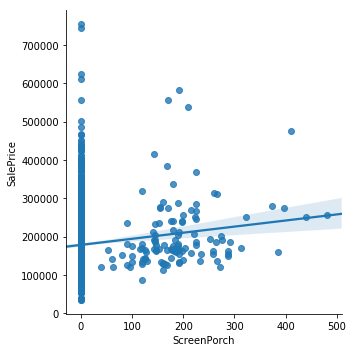

In [816]:
df = train[['ScreenPorch', 'SalePrice']]
sns.lmplot(x = 'ScreenPorch', y = 'SalePrice', data = df)

## 71. PoolArea
Pool area in square feet

In [818]:
train_test_info('PoolArea')

Information of PoolArea 

Train
Number of null :  0
Number of value unique :  8
Kind of value unique :  [  0 512 648 576 555 480 519 738]


Test
Number of null :  0
Number of value unique :  7
Kind of value unique :  [  0 144 368 444 228 561 800]




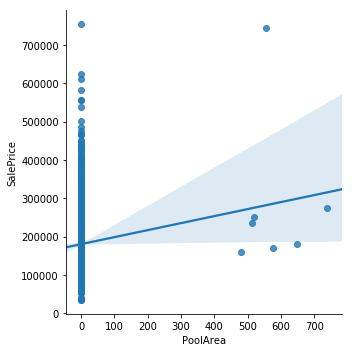

In [819]:
df = train[['PoolArea', 'SalePrice']]
sns.lmplot(x = 'PoolArea', y = 'SalePrice', data = df)

### 72. PoolQC
Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
	

In [820]:
train_test_info('PoolQC')

Information of PoolQC 

Train
Number of null :  1453
Number of value unique :  4
Kind of value unique :  [nan 'Ex' 'Fa' 'Gd']


Test
Number of null :  1456
Number of value unique :  3
Kind of value unique :  [nan 'Ex' 'Gd']




In [821]:
for data in train_test_data:
    data.drop('PoolQC', axis = 1, inplace = True)

## 73. Fence
Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [823]:
train_test_info('Fence')

Information of Fence 

Train
Number of null :  1179
Number of value unique :  5
Kind of value unique :  [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


Test
Number of null :  1169
Number of value unique :  5
Kind of value unique :  ['MnPrv' nan 'GdPrv' 'GdWo' 'MnWw']




In [825]:
for data in train_test_data:
    data.drop('Fence', axis = 1, inplace = True)

### 74. MiscFeature
Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [826]:
train_test_info('MiscFeature')

Information of MiscFeature 

Train
Number of null :  1406
Number of value unique :  5
Kind of value unique :  [nan 'Shed' 'Gar2' 'Othr' 'TenC']


Test
Number of null :  1408
Number of value unique :  4
Kind of value unique :  [nan 'Gar2' 'Shed' 'Othr']




In [827]:
for data in train_test_data:
    data.drop('MiscFeature', axis = 1, inplace = True)

### 75. MiscVal
$Value of miscellaneous feature

In [828]:
train_test_info('MiscVal')

Information of MiscVal 

Train
Number of null :  0
Number of value unique :  21
Kind of value unique :  [    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500]


Test
Number of null :  0
Number of value unique :  26
Kind of value unique :  [    0 12500   500  1500   300   450    80   600   490  1200   650   400
   900  2500   700   750  2000  6500  1000  4500  3000 17000  1512   455
   460   420]




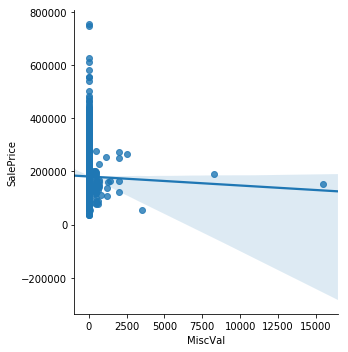

In [829]:
df = train[['MiscVal', 'SalePrice']]
sns.lmplot(x = 'MiscVal', y = 'SalePrice', data = df)

### 76. MoSold
Month Sold (MM)

In [831]:
train_test_info('MoSold')

Information of MoSold 

Train
Number of null :  0
Number of value unique :  12
Kind of value unique :  [ 2  5  9 12 10  8 11  4  1  7  3  6]


Test
Number of null :  0
Number of value unique :  12
Kind of value unique :  [ 6  3  1  4  5  2  7 10  8 11  9 12]




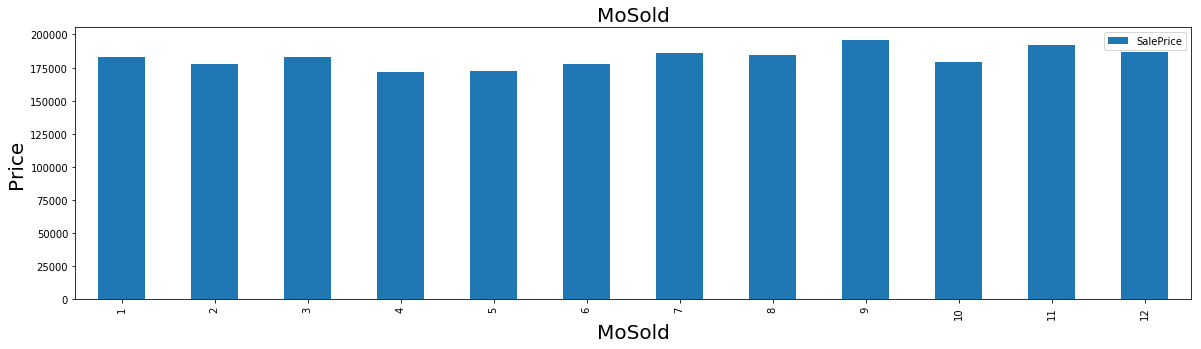

In [832]:
chart_bar('MoSold')

### 77. YrSold
Year Sold (YYYY)

In [833]:
train_test_info('YrSold')

Information of YrSold 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  [2008 2007 2006 2009 2010]


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  [2010 2009 2008 2007 2006]




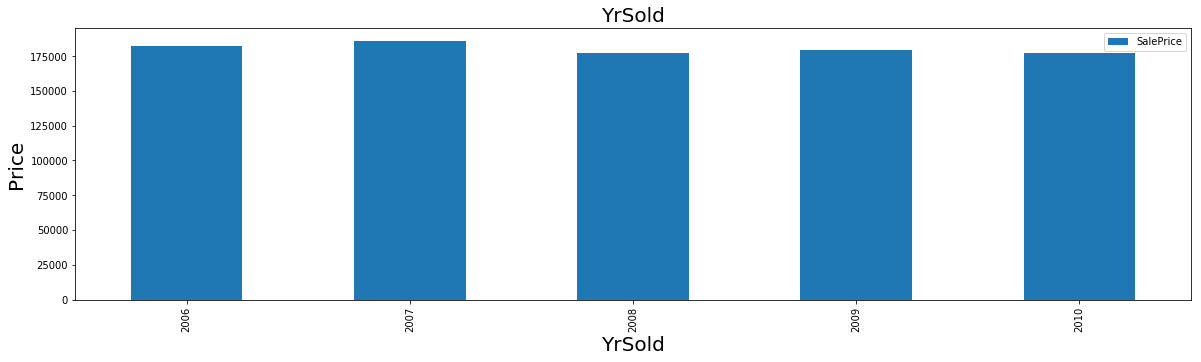

In [834]:
chart_bar('YrSold')

### 78. SaleType
Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [835]:
train_test_info('SaleType')

Information of SaleType 

Train
Number of null :  0
Number of value unique :  9
Kind of value unique :  ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


Test
Number of null :  1
Number of value unique :  10
Kind of value unique :  ['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD' nan]




### 78-1. Fill NaN

In [836]:
for data in train_test_data:
    data['SaleType'] = data['SaleType'].fillna(train['SaleType'].value_counts().argmax())
mapping('SaleType')

Information of SaleType 

Train
Number of null :  0
Number of value unique :  9
Kind of value unique :  [1 7 2 8 9 5 4 6 3]


Test
Number of null :  0
Number of value unique :  9
Kind of value unique :  [1 2 7 8 3 6 4 9 5]




{nan: 0,
 'WD': 1,
 'COD': 2,
 'Oth': 3,
 'ConLw': 4,
 'CWD': 5,
 'Con': 6,
 'New': 7,
 'ConLD': 8,
 'ConLI': 9}

### 79. SaleCondition:
Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [838]:
train_test_info('SaleCondition')

Information of SaleCondition 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  ['Normal' 'Partial' 'Abnorml' 'Family' 'Alloca' 'AdjLand']




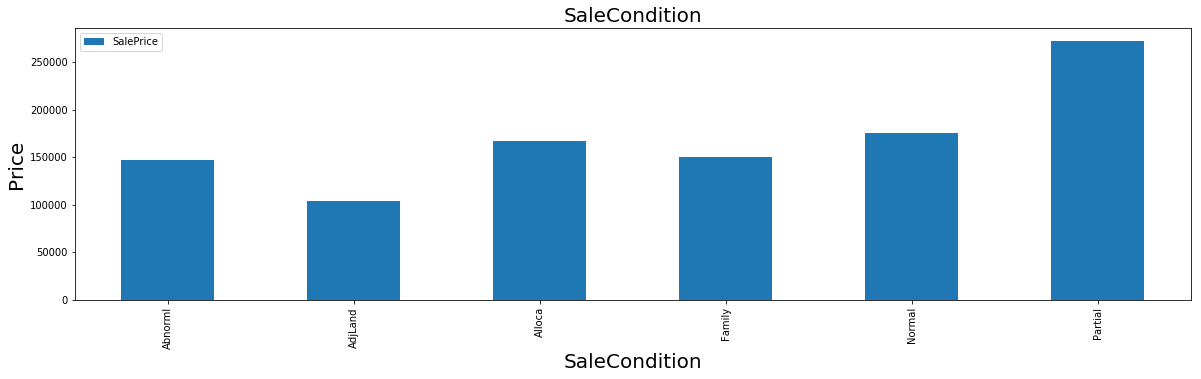

In [839]:
chart_bar('SaleCondition')

In [840]:
mapping('SaleCondition')

Information of SaleCondition 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  [4 3 0 2 1 5]


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  [4 0 3 5 1 2]




{'Abnorml': 3,
 'AdjLand': 2,
 'Alloca': 1,
 'Family': 5,
 'Normal': 4,
 'Partial': 0}

In [842]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null float64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
Exterior2nd      1460 non-null int64
M

In [843]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null int64
Alley            1459 non-null int64
LotShape         1459 non-null int64
LandContour      1459 non-null int64
LotConfig        1459 non-null int64
LandSlope        1459 non-null int64
Neighborhood     1459 non-null int64
Condition1       1459 non-null int64
Condition2       1459 non-null int64
BldgType         1459 non-null int64
HouseStyle       1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null float64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null int64
RoofMatl         1459 non-null int64
Exterior1st      1459 non-null int64
Exterior2nd      1459 non-null int64
M

## Modeling

In [845]:
pd.read_csv('sample_submission.csv')

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
5,1466,177150.989247
6,1467,172070.659229
7,1468,175110.956520
8,1469,162011.698832
9,1470,160726.247831


## 1. Generate train, test data

In [848]:
train_data = train.drop(['SalePrice', 'Id'], axis = 1)
target_data = train['SalePrice']
test_data = test.copy()
test_data = test_data.drop('Id', axis = 1)

In [849]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,14,4,65.0,8450,1,3,1,3,4,1,12,1,1,1,4,7,5,4.0,2,5,7,12,10,1,196.0,2,0,5,3,1,4,706,3,0,150,856,1,3,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,3,6,3,0,0.0,5,2003.0,1,2,548,1,1,2,0,61,0,0,0,0,0,2,2008,1,4
1,3,4,80.0,9600,1,3,1,3,3,1,20,3,1,1,3,6,8,2.0,2,5,7,5,4,2,0.0,3,0,1,3,1,1,978,3,0,284,1262,1,3,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,1,4,3,1,1.0,5,1976.0,1,2,460,1,1,2,298,0,0,0,0,0,0,5,2007,1,4
2,14,4,68.0,11250,1,3,3,3,4,1,12,1,1,1,4,7,5,5.0,3,5,7,12,10,1,162.0,2,0,5,3,1,2,486,3,0,434,920,1,3,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,3,4,3,1,1.0,5,2001.0,1,2,608,1,1,2,0,42,0,0,0,0,0,9,2008,1,4
3,0,4,60.0,9550,1,3,3,3,1,1,21,1,1,1,4,7,5,1.0,1,5,7,14,13,2,0.0,3,0,3,0,3,4,216,3,0,540,756,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,3,5,3,1,3.0,6,1998.0,2,3,642,1,1,2,0,35,272,0,0,0,0,2,2006,1,3
4,14,4,84.0,14260,1,3,3,3,3,1,1,1,1,1,4,8,5,4.0,2,5,7,12,10,1,350.0,2,0,5,3,1,3,655,3,0,490,1145,1,3,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,3,7,3,1,1.0,5,2000.0,1,3,836,1,1,2,192,84,0,0,0,0,0,12,2008,1,4


In [850]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,3,5,80.0,11622,1,3,1,3,4,1,24,3,1,1,3,5,6,1.0,0,5,7,12,10,2,0.0,3,0,1,0,1,4,468.0,6,144.0,270.0,882.0,1,0,1,4,896,0,0,896,0.0,0.0,1,0,2,1,1,3,3,0,0.0,5,1961.0,2,1.0,730.0,1,1,2,140,0,0,0,120,0,0,6,2010,1,4
1,3,4,81.0,14267,1,3,3,3,1,1,24,1,1,1,3,6,6,1.0,0,1,7,14,15,1,108.0,3,0,1,0,1,4,923.0,3,0.0,406.0,1329.0,1,0,1,4,1329,0,0,1329,0.0,0.0,1,1,3,1,3,4,3,0,0.0,5,1958.0,2,1.0,312.0,1,1,2,393,36,0,0,0,0,12500,6,2010,1,4
2,14,4,74.0,13830,1,3,3,3,4,1,14,1,1,1,4,5,5,4.0,3,5,7,12,10,2,0.0,3,0,5,3,1,4,791.0,3,0.0,137.0,928.0,1,2,1,4,928,701,0,1629,0.0,0.0,2,1,3,1,1,4,3,1,1.0,5,1997.0,3,2.0,482.0,1,1,2,212,34,0,0,0,0,0,3,2010,1,4
3,14,4,78.0,9978,1,3,3,3,4,1,14,1,1,1,4,6,6,4.0,3,5,7,12,10,1,20.0,3,0,5,2,1,4,602.0,3,0.0,324.0,926.0,1,3,1,4,926,678,0,1604,0.0,0.0,2,1,3,1,3,5,3,1,3.0,5,1998.0,3,2.0,470.0,1,1,2,360,36,0,0,0,0,0,6,2010,1,4
4,13,4,43.0,5005,1,3,3,1,4,1,8,1,1,2,3,8,5,4.0,2,5,7,4,2,2,0.0,2,0,5,3,1,4,263.0,3,0.0,1017.0,1280.0,1,3,1,4,1280,0,0,1280,0.0,0.0,2,0,2,1,3,3,3,0,0.0,5,1992.0,1,2.0,506.0,1,1,2,0,82,0,0,144,0,0,1,2010,1,4


## 2. Cross Validation

In [853]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

### 3. Models

In [872]:
sub = pd.read_csv('sample_submission.csv')
sub.head(4)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511


In [858]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(train_data, target_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [862]:
def print_score(alg, score, params):
    print('%s score is %f with params %s' % (alg, score, json.dumps(params)))

In [863]:
best = lr

In [866]:
from sklearn.metrics import mean_squared_error

y_val_pred = best.predict(train_data)

In [868]:
mse = mean_squared_error(target_data, y_val_pred)
print('ridge mean squared error is %s' % \
      '{:,.2f}'.format(mse))

ridge mean squared error is 995,855,113.37


In [870]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

print("Ridge RMSLE is %f" % rmsle(y_val_pred, target_data))

Ridge RMSLE is 0.158596


In [875]:
a = best.predict(test_data)
submission_data = pd.DataFrame({'Id' : test['Id'], 'SalePrice' : a})
submission_data.to_csv('Submission.csv')

## 배운것들
1. 상관관계 그래프로 그리기(df.corr() > 그래프)
 - heatmap : sns.heatmap(df.corr())
 - regression model graph : sns.lmplot(x = column, y = column, df)<br>
 - 참고https://stackoverflow.com/questions/44270219/correlation-using-pandas-and-plot
    

2. 변수의 유형
 - 이산형 변수(discrete variable)와 연속형 변수(continuous variable)
 
 
3. pandas mapping할 때
 - .map()보다는 .relpace()가 더 좋음, map을 하면 nan값 존재할 때 전부 nan으로 바뀜